In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import squarify

In [190]:
cases_data = pd.read_csv("/kaggle/input/covid-19-case-surveillance/data.csv")

/tmp/ipykernel_120/1842049132.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  cases_data = pd.read_csv("/kaggle/input/covid-19-case-surveillance/data.csv")


In [208]:
cases_data.count()

case_month                         19020962
res_state                          19020622
state_fips_code                    19020622
res_county                         17662923
county_fips_code                   17662923
age_group                          18818938
sex                                18390746
race                               15934453
ethnicity                          15559220
case_positive_specimen_interval     8005428
case_onset_interval                 6937065
process                            19020962
exposure_yn                        19020962
current_status                     19020962
symptom_status                     19020962
hosp_yn                            19020962
icu_yn                             19020962
death_yn                           18404456
underlying_conditions_yn             700368
dtype: int64

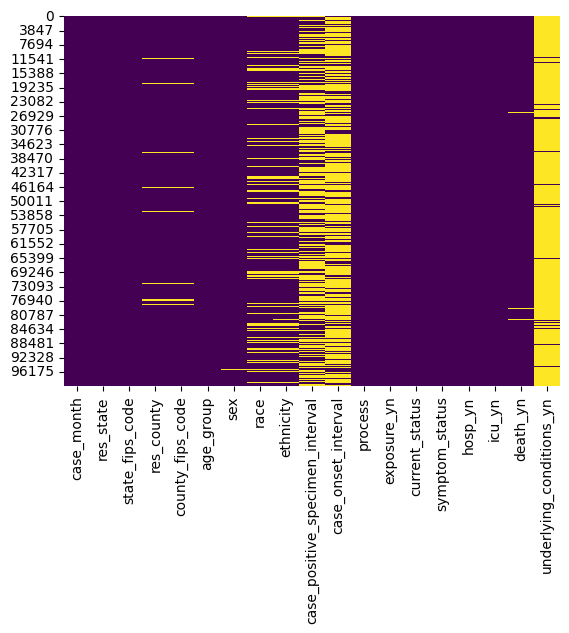

In [5]:
sns.heatmap(cases_data.isnull(), cbar=False, cmap='viridis')
plt.show()

In [ ]:
from functools import reduce


# Calculate the proportion of missing values
nan_proportion = (cases_data.isnull().sum() / (cases_data.notnull().sum() + cases_data.isnull().sum())).to_frame(name='NaN')

# Calculate the proportion of 'Missing' values
missing_proportion = (cases_data[cases_data == "Missing"].count() / (cases_data.notnull().sum() + cases_data.isnull().sum())).to_frame(name='Missing')

# Calculate the proportion of 'Unknown' values
unknown_proportion= (cases_data[cases_data == "Unknown"].count() / (cases_data.notnull().sum() + cases_data.isnull().sum())).to_frame(name='Unknown')

# Calculate the proportion of clean entries
clean_proportion = ((cases_data.notnull().sum() - (cases_data[cases_data == "Missing"].count() + cases_data[cases_data == "Unknown"].count())) / (cases_data.notnull().sum() + cases_data.isnull().sum())).to_frame(name='Clean')

# Display the combined DataFrame
data_frames = [nan_proportion, missing_proportion, unknown_proportion, clean_proportion]


df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['my_column_name'], how='outer'), data_frames)


In [211]:
df_merged.map('{:.1%}'.format)

,NaN,Missing,Unknown,Clean
my_column_name,,,,
age_group,0.1%,0.4%,0.0%,99.6%
case_month,0.0%,0.0%,0.0%,100.0%
case_onset_interval,69.4%,0.0%,0.0%,30.6%
case_positive_specimen_interval,56.0%,0.0%,0.0%,44.0%
county_fips_code,2.7%,0.0%,0.0%,97.3%
current_status,0.0%,0.0%,0.0%,100.0%
death_yn,0.9%,57.2%,9.6%,32.3%
ethnicity,16.1%,1.4%,27.8%,54.6%
exposure_yn,0.0%,93.5%,2.1%,4.4%


In [212]:
cases_data.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
1,2022-02,MI,26.0,OAKLAND,26125.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Unknown,NaN
2,2022-01,CA,6.0,LOS ANGELES,6037.0,18 to 49 years,Male,Unknown,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Missing,NaN
3,2022-01,NV,32.0,CLARK,32003.0,18 to 49 years,Male,White,Non-Hispanic/Latino,0.0,NaN,Routine surveillance,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Missing,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [215]:
cases_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020962 entries, 0 to 19020961
Data columns (total 19 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   case_month                       object 
 1   res_state                        object 
 2   state_fips_code                  float64
 3   res_county                       object 
 4   county_fips_code                 float64
 5   age_group                        object 
 6   sex                              object 
 7   race                             object 
 8   ethnicity                        object 
 9   case_positive_specimen_interval  float64
 10  case_onset_interval              float64
 11  process                          object 
 12  exposure_yn                      object 
 13  current_status                   object 
 14  symptom_status                   object 
 15  hosp_yn                          object 
 16  icu_yn                           object 
 17  death_

In [213]:
puf_data = pd.read_csv('/kaggle/input/household-pulse-survey/pulse_puf_most_recent.csv')

In [214]:
puf_data.head()

,scram,week_x,est_st,est_msa,pweight,tbirth_year,abirth_year,egender,agender,rhispanic,...,eipspnd4,eipspnd5,eipspnd6,eipspnd7,eipspnd8,eipspnd9,eipspnd10,eipspnd11,eipspnd12,eipspnd13
0,V010000001S10011099370111,1,47,NaN,1973.489532,1986,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,V010000001S10011900470112,1,1,NaN,1929.488419,1955,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,V010000001S18010744940111,1,26,NaN,1526.612380,1976,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V010000001S37010301340112,1,1,NaN,2734.635354,1964,2,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,V010000001S37010480340111,1,1,NaN,681.211425,1963,2,2,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
puf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1088314 entries, 0 to 1088313
Columns: 215 entries, scram to eipspnd13
dtypes: float64(130), int64(78), object(7)
memory usage: 1.7+ GB


## PART 1: Exploratory Analysis

In [217]:
cases_data.replace(['Missing', 'Unknown'], np.nan, inplace=True)

puf_data.replace([-88, -99], np.nan, inplace=True)

#### 1. The total number of hospitalizations versus deaths from COVID-19 over the entire US per month-year timestamp.

In [218]:
hosp_deaths_monthly = pd.merge(
        cases_data[cases_data['hosp_yn'] == 'Yes'].groupby(by="case_month")['hosp_yn'].count(),
        cases_data[cases_data['death_yn'] == 'Yes'].groupby(by="case_month")['death_yn'].count(),
        how='inner',
        on='case_month')

hosp_deaths_monthly

,hosp_yn,death_yn
case_month,,
2020-01,69,62
2020-02,285,25
2020-03,16586,3435
2020-04,25507,9577
2020-05,11954,2687
2020-06,11954,1255
2020-07,18366,2996
2020-08,12516,1850
2020-09,9985,944


<Axes: xlabel='case_month'>

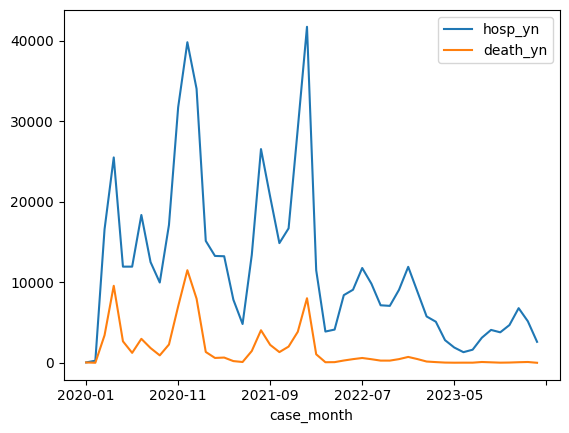

In [219]:
hosp_deaths_monthly.plot.line()

#### 2. The average rates of COVID-related deaths relative to patient demographics

In [220]:
total_deaths = cases_data[cases_data['death_yn'] == 'Yes']
total_deaths.replace(['Missing', 'Unknown'], np.nan, inplace=True)
total_deaths = total_deaths.dropna()

/tmp/ipykernel_120/208467356.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_deaths.replace(['Missing', 'Unknown'], np.nan, inplace=True)


In [221]:
death_by_sex = total_deaths.groupby(by="sex")['death_yn'].count()/total_deaths['sex'].count()
death_by_race = total_deaths.groupby(by="race")['death_yn'].count()/total_deaths['race'].count()
death_by_ethn = total_deaths.groupby(by="ethnicity")['death_yn'].count()/total_deaths['ethnicity'].count()


In [222]:
print(death_by_sex.map('{:.2%}'.format), '\n')
print(death_by_race.map('{:.2%}'.format), '\n')
print(death_by_ethn.map('{:.2%}'.format))


sex
Female    45.61%
Male      54.39%
Name: death_yn, dtype: object 

race
Asian     3.51%
Black     5.85%
White    90.64%
Name: death_yn, dtype: object 

ethnicity
Hispanic/Latino        13.16%
Non-Hispanic/Latino    86.84%
Name: death_yn, dtype: object


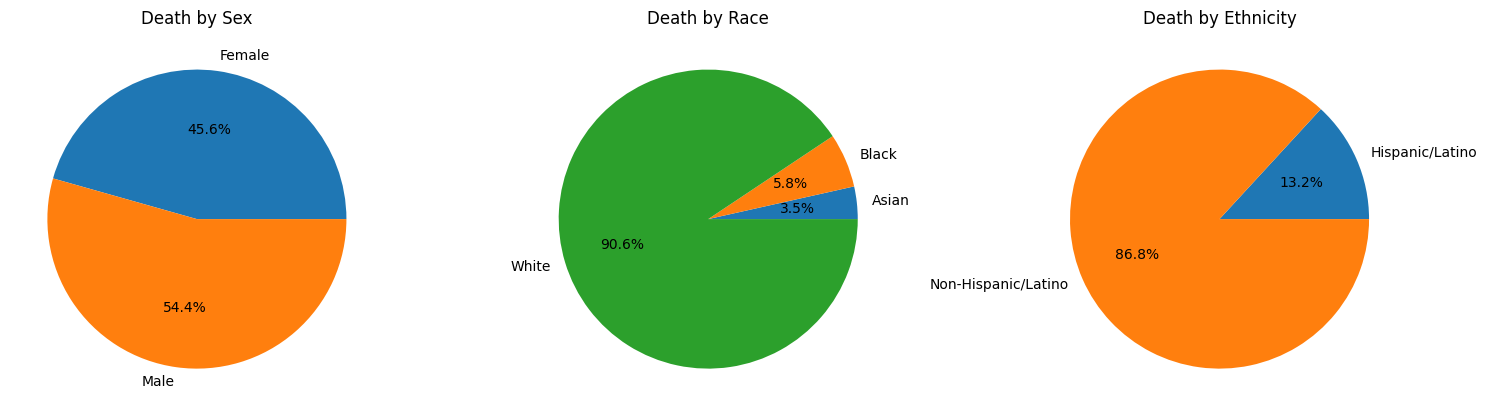

In [223]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

death_by_sex.plot.pie(ax=ax[0], autopct='%1.1f%%')
ax[0].set_ylabel('')
ax[0].set_title('Death by Sex')

death_by_race.plot.pie(ax=ax[1], autopct='%1.1f%%')
ax[1].set_ylabel('')
ax[1].set_title('Death by Race')

death_by_ethn.plot.pie(ax=ax[2], autopct='%1.1f%%')
ax[2].set_ylabel('')
ax[2].set_title('Death by Ethnicity')

plt.tight_layout()
plt.show()


#### 3. The rates of COVID-related hospitalization and death with age (across age groups).

In [168]:
cases_death_hosp = cases_data.loc[:,['death_yn', 'hosp_yn', "age_group"]]
cases_death_hosp.replace(['Missing', 'Unknown'], np.nan, inplace=True)


cases_death_hosp_percent = ((cases_death_hosp.dropna().groupby(by="age_group").count() /cases_death_hosp.dropna().count())).loc[:,['death_yn', 'hosp_yn']]
cases_death_hosp_percent.map('{:.2%}'.format)

my_column_name,death_yn,hosp_yn
age_group,,
0 - 17 years,21.65%,21.65%
18 to 49 years,49.07%,49.07%
50 to 64 years,17.56%,17.56%
65+ years,11.72%,11.72%


<Axes: xlabel='age_group'>

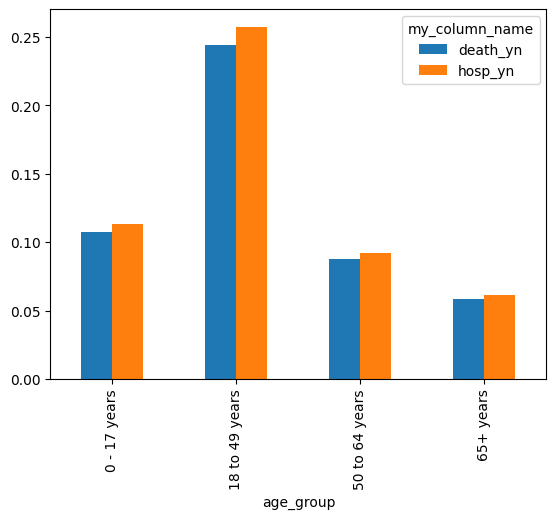

In [137]:
cases_death_hosp_percent.plot.bar()

#### 4. Average rate of COVID-related hospitalization and death per state over the entire study period.

In [167]:
states_death_hosp = cases_data.loc[:,['death_yn', 'hosp_yn', "res_state"]]
states_death_hosp.replace(['Missing', 'Unknown'], np.nan, inplace=True)

states_death_hosp_percent = ((states_death_hosp.dropna().groupby(by="res_state").count() /states_death_hosp.dropna().count())).loc[:,['death_yn', 'hosp_yn']]
states_death_hosp_percent.map('{:.2%}'.format)

my_column_name,death_yn,hosp_yn
res_state,,
AZ,3.89%,3.89%
CA,0.36%,0.36%
FL,27.44%,27.44%
IL,0.13%,0.13%
MA,0.76%,0.76%
MI,3.59%,3.59%
MN,1.17%,1.17%
NC,3.66%,3.66%
NV,4.88%,4.88%


<Axes: xlabel='res_state'>

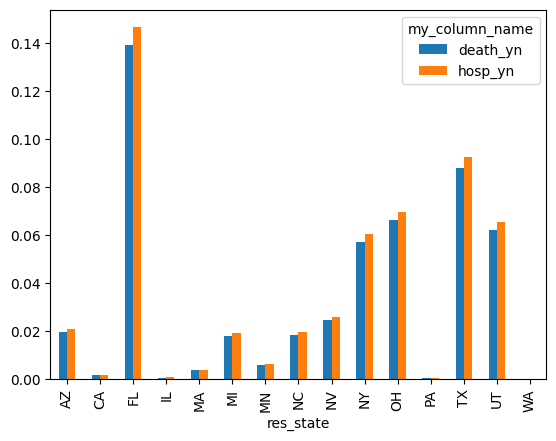

In [141]:
states_death_hosp_percent.plot.bar()

#### 5.The relationship between age, pre-existing medical conditions and/or risk behaviors, and rate of admittance to the ICU.


In [166]:
underlying_icu = cases_data.loc[:,['underlying_conditions_yn', 'icu_yn']]
underlying_icu.replace(['Missing', 'Unknown'], np.nan, inplace=True)

underlying_icu_percent = ((underlying_icu.dropna().groupby(by="underlying_conditions_yn").count() /underlying_icu.dropna().count())).loc[:,[ 'icu_yn']]
underlying_icu_percent.map('{:.2%}'.format)

my_column_name,icu_yn
underlying_conditions_yn,
No,3.97%
Yes,96.03%


In [225]:
cases_death_hosp = cases_data.loc[:,['icu_yn', "age_group"]]
cases_death_hosp.replace(['Missing', 'Unknown'], np.nan, inplace=True)


cases_death_hosp_percent = ((cases_death_hosp.dropna().groupby(by="age_group").count() /cases_death_hosp.dropna().count())).loc[:,['icu_yn']]
cases_death_hosp_percent.map('{:.2%}'.format)

,icu_yn
age_group,
0 - 17 years,15.68%
18 to 49 years,44.16%
50 to 64 years,19.03%
65+ years,21.13%


#### 6. The rate of expected employment loss due to COVID-19 and sector of employment.


In [173]:
exp_loss = puf_data.loc[:,['expctloss', "kindwork"]]
exp_loss.replace([-99, -88], np.nan, inplace=True)


exp_loss_percent = ((exp_loss.dropna()[puf_data['expctloss']==1].groupby(by="kindwork").count() /exp_loss.dropna().count())).loc[:,['expctloss']]
exp_loss_percent.map('{:.2%}'.format)


/tmp/ipykernel_120/112933631.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  exp_loss_percent = ((exp_loss.dropna()[puf_data['expctloss']==1].groupby(by="kindwork").count() /exp_loss.dropna().count())).loc[:,['expctloss']]


,expctloss
kindwork,
1.0,3.94%
2.0,15.35%
3.0,3.52%
4.0,4.91%
5.0,0.67%


#### 7. The rate of expected employment loss due to COVID-19 relative to responders demographics.

In [188]:
def state_num_to_abb(num):
    state_abbreviations = {
    1: 'AL',  # Alabama
    2: 'AK',  # Alaska
    4: 'AZ',  # Arizona
    5: 'AR',  # Arkansas
    6: 'CA',  # California
    8: 'CO',  # Colorado
    9: 'CT',  # Connecticut
    10: 'DE',  # Delaware
    11: 'DC',  # District of Columbia
    12: 'FL',  # Florida
    13: 'GA',  # Georgia
    15: 'HI',  # Hawaii
    16: 'ID',  # Idaho
    17: 'IL',  # Illinois
    18: 'IN',  # Indiana
    19: 'IA',  # Iowa
    20: 'KS',  # Kansas
    21: 'KY',  # Kentucky
    22: 'LA',  # Louisiana
    23: 'ME',  # Maine
    24: 'MD',  # Maryland
    25: 'MA',  # Massachusetts
    26: 'MI',  # Michigan
    27: 'MN',  # Minnesota
    28: 'MS',  # Mississippi
    29: 'MO',  # Missouri
    30: 'MT',  # Montana
    31: 'NE',  # Nebraska
    32: 'NV',  # Nevada
    33: 'NH',  # New Hampshire
    34: 'NJ',  # New Jersey
    35: 'NM',  # New Mexico
    36: 'NY',  # New York
    37: 'NC',  # North Carolina
    38: 'ND',  # North Dakota
    39: 'OH',  # Ohio
    40: 'OK',  # Oklahoma
    41: 'OR',  # Oregon
    42: 'PA',  # Pennsylvania
    44: 'RI',  # Rhode Island
    45: 'SC',  # South Carolina
    46: 'SD',  # South Dakota
    47: 'TN',  # Tennessee
    48: 'TX',  # Texas
    49: 'UT',  # Utah
    50: 'VT',  # Vermont
    51: 'VA',  # Virginia
    53: 'WA',  # Washington
    54: 'WV',  # West Virginia
    55: 'WI',  # Wisconsin
    56: 'WY',  # Wyoming
}

    return state_abbreviations[num]
    

In [226]:
puf_data['res_state'] = puf_data['est_st'].apply(state_num_to_abb)

In [240]:
age_expctloss = \
(puf_data.loc[:,['tbirth_year','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="tbirth_year").count().loc[:,'expctloss']\
/ puf_data.loc[:,['tbirth_year','expctloss']].dropna().groupby(by="tbirth_year").count().loc[:,'expctloss'] )\


age_expctloss.map('{:.2%}'.format)

/tmp/ipykernel_120/3087419389.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (puf_data.loc[:,['tbirth_year','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="tbirth_year").count().loc[:,'expctloss']\


tbirth_year
1932    10.38%
1933     7.24%
1934     7.01%
1935     8.02%
1936     8.39%
         ...  
1998    35.76%
1999    35.46%
2000    33.68%
2001    28.31%
2002    24.16%
Name: expctloss, Length: 71, dtype: object

<Axes: xlabel='tbirth_year'>

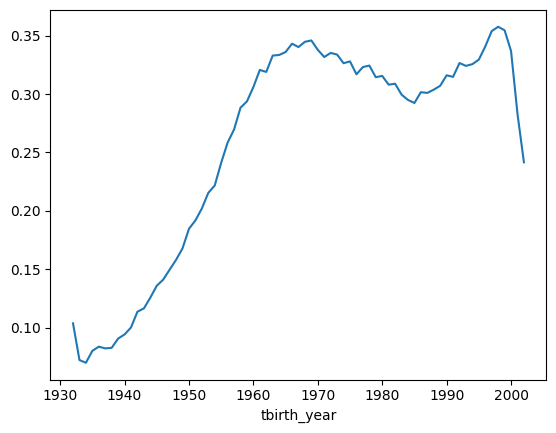

In [241]:
age_expctloss.plot.line()

In [242]:
gender_expctloss = \
(puf_data.loc[:,['egender','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="egender").count().loc[:,'expctloss']\
/ puf_data.loc[:,['egender','expctloss']].dropna().groupby(by="egender").count().loc[:,'expctloss'] )\


gender_expctloss.map('{:.2%}'.format)

/tmp/ipykernel_120/4061527147.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (puf_data.loc[:,['egender','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="egender").count().loc[:,'expctloss']\


egender
1    27.24%
2    28.55%
Name: expctloss, dtype: object

<Axes: xlabel='egender'>

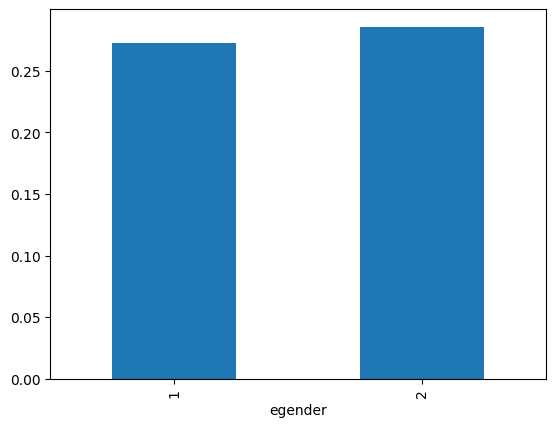

In [243]:
gender_expctloss.plot.bar()

In [245]:
res_expctloss = \
(puf_data.loc[:,['res_state','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="res_state").count().loc[:,'expctloss']\
/ puf_data.loc[:,['res_state','expctloss']].dropna().groupby(by="res_state").count().loc[:,'expctloss'] )\


res_expctloss.map('{:.2%}'.format)

/tmp/ipykernel_120/1184469129.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (puf_data.loc[:,['res_state','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="res_state").count().loc[:,'expctloss']\


res_state
AK    26.63%
AL    24.92%
AR    23.86%
AZ    26.78%
CA    34.12%
CO    25.83%
CT    28.98%
DC    22.61%
DE    25.32%
FL    32.58%
GA    30.58%
HI    39.63%
IA    23.87%
ID    22.44%
IL    28.24%
IN    25.70%
KS    23.61%
KY    26.89%
LA    33.32%
MA    28.39%
MD    26.54%
ME    26.26%
MI    31.31%
MN    26.71%
MO    25.34%
MS    30.88%
MT    24.47%
NC    25.64%
ND    22.38%
NE    21.65%
NH    24.70%
NJ    32.70%
NM    27.03%
NV    37.41%
NY    32.26%
OH    25.07%
OK    25.66%
OR    31.47%
PA    28.18%
RI    28.42%
SC    25.99%
SD    22.04%
TN    27.47%
TX    31.40%
UT    20.16%
VA    24.06%
VT    27.83%
WA    27.12%
WI    24.74%
WV    23.97%
WY    22.88%
Name: expctloss, dtype: object

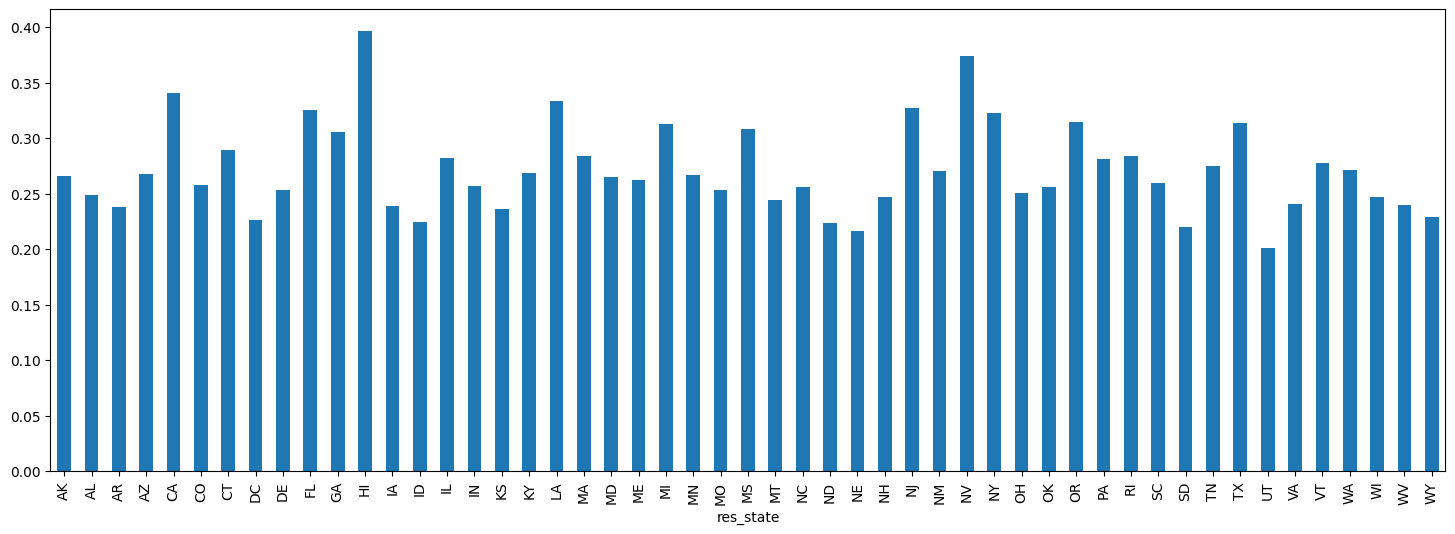

In [249]:
fig, ax = plt.subplots(figsize=(18, 6)) 

res_expctloss.plot.bar(ax=ax)

plt.show()

#### 8. The rate of expected employment loss due to COVID-19 for the top 10 states with the highest rate of COVID hospitalization.

In [195]:
states_expctloss = \
(puf_data.loc[:,['res_state','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="res_state").count().loc[:,'expctloss']\
/ puf_data.loc[:,['res_state','expctloss']].dropna().groupby(by="res_state").count().loc[:,'expctloss'] )\
.map('{:.2%}'.format)

/tmp/ipykernel_120/3731315110.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  (puf_data.loc[:,['res_state','expctloss']].dropna()[puf_data['expctloss']==1].dropna().groupby(by="res_state").count().loc[:,'expctloss']\


In [232]:
states_hosp = \
(cases_data.loc[:,['res_state','hosp_yn']].dropna().groupby(by="res_state").count().loc[:,['hosp_yn']] /cases_data.loc[:,['hosp_yn']].dropna().count())

In [233]:
hosp = pd.merge(states_hosp , states_expctloss, how="outer", on="res_state").sort_values(by=["hosp_yn"], ascending = [False]).iloc[:10,:1]
hosp.map('{:.2%}'.format)

,hosp_yn
res_state,
CA,16.66%
NJ,8.35%
TX,7.34%
FL,6.65%
IN,5.77%
NY,3.91%
OH,3.36%
IL,3.18%
NC,3.09%


<Axes: xlabel='res_state'>

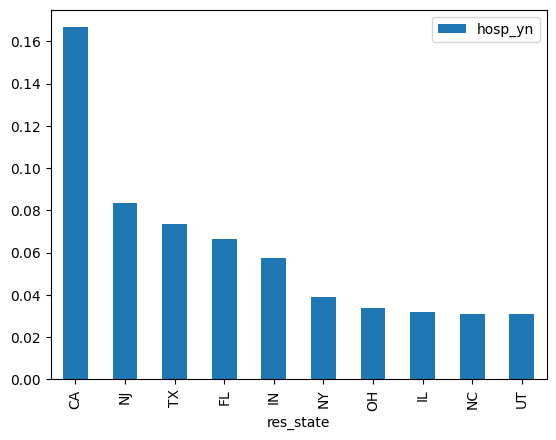

In [234]:
hosp.plot.bar()

#### 9. The relationship between household income and the rate of delayed/ OR unobtained medical treatment (Due to COVID or otherwise).

In [203]:
income_delay = (puf_data[puf_data['delay'] == 1].groupby(by="income").count().loc[:,['delay']]\
/ puf_data['income'].dropna().count())\

income_delay.map('{:.2%}'.format)

,delay
income,
1.0,5.14%
2.0,3.76%
3.0,4.64%
4.0,7.37%
5.0,6.15%
6.0,7.56%
7.0,3.70%
8.0,4.27%


<Axes: xlabel='income'>

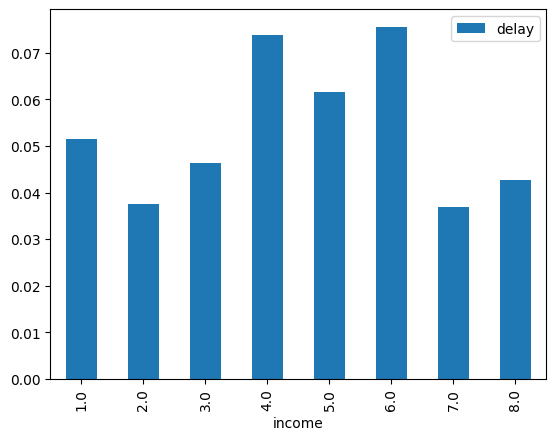

In [204]:
income_delay.plot.bar()

#### 10. The relationship between COVID-19 symptom manifestation and age group.

In [205]:
sym_age = (cases_data[cases_data['symptom_status'] == 'Symptomatic'].groupby(by="age_group").count().loc[:,['symptom_status']]
/ cases_data['age_group'].count())

sym_age.map('{:.2%}'.format)

,symptom_status
age_group,
0 - 17 years,5.27%
18 to 49 years,15.64%
50 to 64 years,4.88%
65+ years,2.68%


<Axes: xlabel='age_group'>

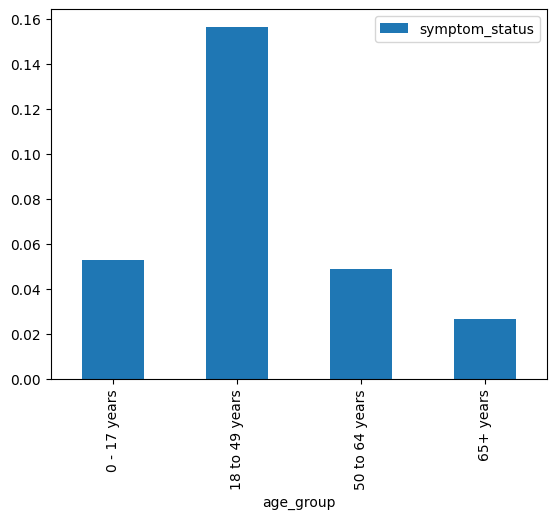

In [206]:
sym_age.plot.bar()

# PART 2: Answering Questions

#### 1. Are hospitalized patients with underlying medical conditions and/or risk behaviors more likely to die from COVID-19?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


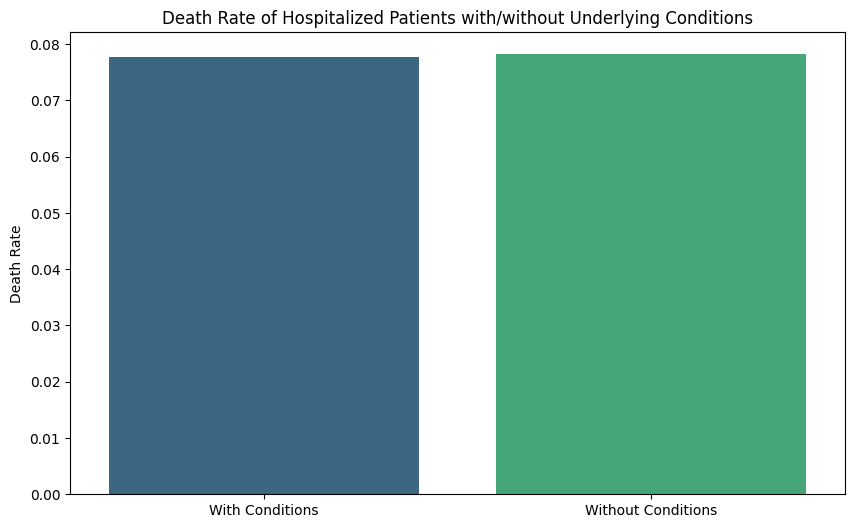

Death rate for hospitalized patients with underlying conditions: 7.78%
Death rate for hospitalized patients without underlying conditions: 7.82%


In [ ]:
# Create new columns for death and hospitalization
cases_data['Death'] = (cases_data['death_yn'] == 'Yes').astype(int)
cases_data['Hospitalized'] = (cases_data['hosp_yn'] == 'Yes').astype(int)

# Filter patients with underlying conditions
conditions = cases_data['underlying_conditions_yn'] == 'Yes'

# patients who have underlying conditions and are hospitalized
with_conditions = cases_data[conditions & cases_data['Hospitalized'] == 1]['Death']
# patients who are without underlying conditions and are hospitalized
without_conditions = cases_data[~conditions & cases_data['Hospitalized'] == 1]['Death']
# death rates
death_rate_with_conditions = with_conditions.mean()
death_rate_without_conditions = without_conditions.mean()

# Visualization
labels = ['With Conditions', 'Without Conditions']
rates = [death_rate_with_conditions, death_rate_without_conditions]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=rates, palette="viridis")
plt.title('Death Rate of Hospitalized Patients with/without Underlying Conditions')
plt.ylabel('Death Rate')
plt.show()

# Helpful Insights
print(f"Death rate for hospitalized patients with underlying conditions: {death_rate_with_conditions:.2%}")
print(f"Death rate for hospitalized patients without underlying conditions: {death_rate_without_conditions:.2%}")


#### 2. Who are the people (the demographic segment) that appear to be most at risk of death due to COVID-19? Who is the least at risk?

/tmp/ipykernel_34/2761188330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Death'] = filtered_data['death_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
/tmp/ipykernel_34/2761188330.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rates = filtered_data.groupby(group_by_col)['Death'].mean()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observe

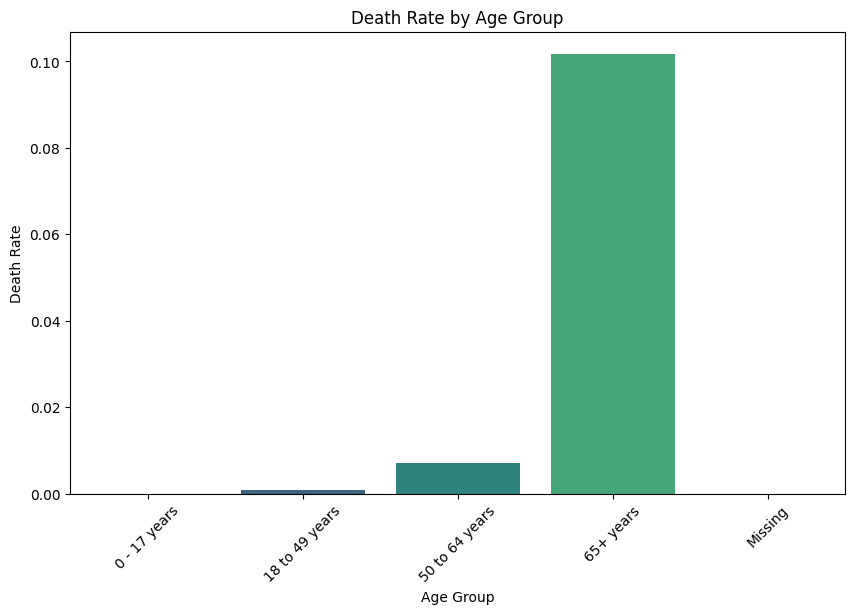

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


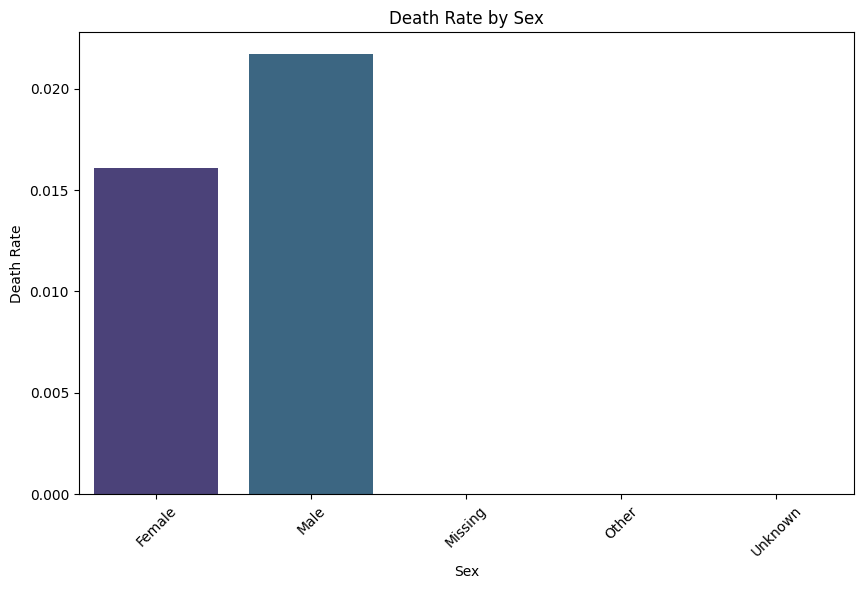

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


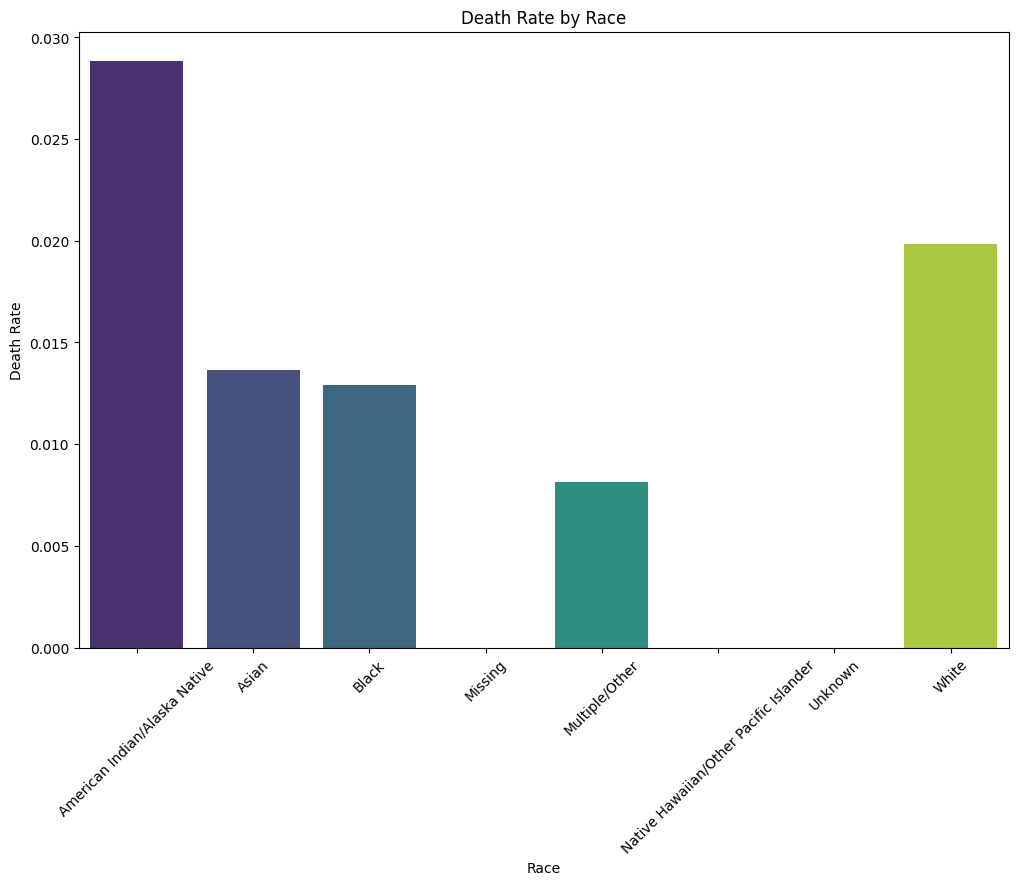

Age group most at risk of death: 65+ years
Age group least at risk of death: 0 - 17 years
Sex most at risk of death: Male
Sex least at risk of death: Female
Race most at risk of death: American Indian/Alaska Native
Race least at risk of death: Native Hawaiian/Other Pacific Islander


In [ ]:
cases_data['death_yn'] = cases_data['death_yn'].astype('category')

# Handle missing values appropriately
filtered_data = cases_data[(cases_data['age_group'].notna()) & (cases_data['death_yn'].notna()) & 
                           (cases_data['sex'].notna()) & (cases_data['race'].notna()) & 
                           (cases_data['age_group'] != 'Missing') & (cases_data['death_yn'] != 'Missing') & 
                           (cases_data['age_group'] != 'Unknown') & (cases_data['death_yn'] != 'Unknown') & 
                           (cases_data['sex'] != 'Missing') & (cases_data['race'] != 'Missing') & 
                           (cases_data['sex'] != 'Unknown') & (cases_data['race'] != 'Unknown')]

# Create binary column for death
filtered_data['Death'] = filtered_data['death_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Function to calculate death rates by demographic segment
def calculate_death_rate(group_by_col):
    death_rates = filtered_data.groupby(group_by_col)['Death'].mean()
    return death_rates

# Calculate death rates by age group
age_group_death_rates = calculate_death_rate('age_group')
# Calculate death rates by sex
sex_death_rates = calculate_death_rate('sex')
# Calculate death rates by race
race_death_rates = calculate_death_rate('race')

# Visualization for each demographic segment

# Death rates by age group
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_death_rates.index, y=age_group_death_rates.values, palette="viridis")
plt.title('Death Rate by Age Group')
plt.ylabel('Death Rate')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.show()

# Death rates by sex
plt.figure(figsize=(10, 6))
sns.barplot(x=sex_death_rates.index, y=sex_death_rates.values, palette="viridis")
plt.title('Death Rate by Sex')
plt.ylabel('Death Rate')
plt.xlabel('Sex')
plt.xticks(rotation=45)
plt.show()

# Death rates by race
plt.figure(figsize=(12, 8))
sns.barplot(x=race_death_rates.index, y=race_death_rates.values, palette="viridis")
plt.title('Death Rate by Race')
plt.ylabel('Death Rate')
plt.xlabel('Race')
plt.xticks(rotation=45)
plt.show()

# Identifying the most and least at risk groups

most_at_risk_age_group = age_group_death_rates.idxmax()
least_at_risk_age_group = age_group_death_rates.idxmin()

most_at_risk_sex = sex_death_rates.idxmax()
least_at_risk_sex = sex_death_rates.idxmin()

most_at_risk_race = race_death_rates.idxmax()
least_at_risk_race = race_death_rates.idxmin()

# Commentary
print(f"Age group most at risk of death: {most_at_risk_age_group}")
print(f"Age group least at risk of death: {least_at_risk_age_group}")

print(f"Sex most at risk of death: {most_at_risk_sex}")
print(f"Sex least at risk of death: {least_at_risk_sex}")

print(f"Race most at risk of death: {most_at_risk_race}")
print(f"Race least at risk of death: {least_at_risk_race}")

#### 3. What percent of patients who have reported exposure to any kind of travel /or congregation within the 14 days prior to illness onset end up hospitalized? What percent of those go on to be hospitalized?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


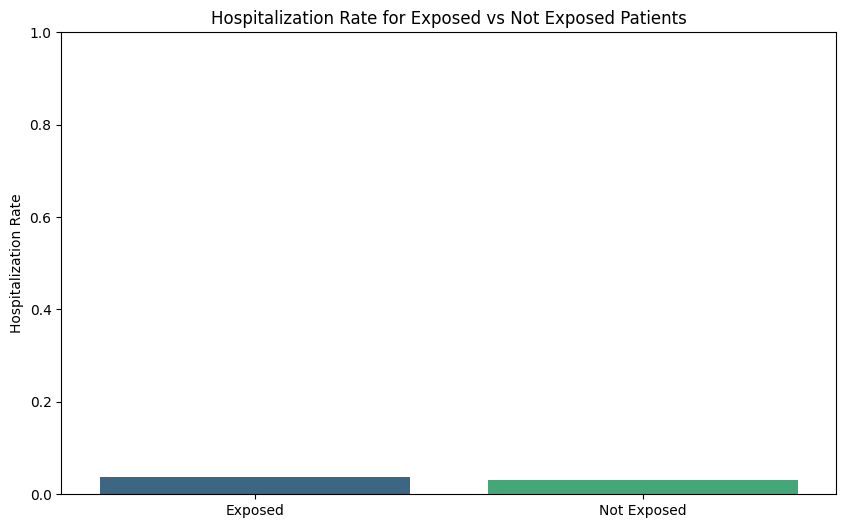

Hospitalization rate for patients with exposure: 3.73%
Hospitalization rate for patients without exposure: 3.09%

Public health interventions and guidelines should emphasize the importance of avoiding non-essential travel and large gatherings to mitigate the spread of the virus and reduce the burden on healthcare systems.


In [ ]:
# Ensure the relevant columns are treated as categorical
cases_data['exposure_yn'] = cases_data['exposure_yn'].astype('category')
cases_data['hosp_yn'] = cases_data['hosp_yn'].astype('category')

# Drop rows with missing values in relevant columns
cases_data.dropna(subset=['exposure_yn', 'hosp_yn'], inplace=True)

# Create binary columns for exposure and hospitalization
cases_data['Exposure'] = cases_data['exposure_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
cases_data['Hospitalized'] = cases_data['hosp_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate hospitalization rates for exposed and non-exposed patients
exposure_hospitalization_rate = cases_data[cases_data['Exposure'] == 1]['Hospitalized'].mean()
non_exposure_hospitalization_rate = cases_data[cases_data['Exposure'] == 0]['Hospitalized'].mean()

# Visualization
labels = ['Exposed', 'Not Exposed']
rates = [exposure_hospitalization_rate, non_exposure_hospitalization_rate]

plt.figure(figsize=(10, 6))
sns.barplot(x=labels, y=rates, palette="viridis")
plt.title('Hospitalization Rate for Exposed vs Not Exposed Patients')
plt.ylabel('Hospitalization Rate')
plt.ylim(0, 1)
plt.show()

# Commentary
print(f"Hospitalization rate for patients with exposure: {exposure_hospitalization_rate:.2%}")
print(f"Hospitalization rate for patients without exposure: {non_exposure_hospitalization_rate:.2%}")
print("\nPublic health interventions and guidelines should emphasize the importance of avoiding non-essential travel and large gatherings to mitigate the spread of the virus and reduce the burden on healthcare systems.")

#### 4. Are Asymptomatic COVID patients less likely to be hospitalized? Are they less likely to die from their illness?

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


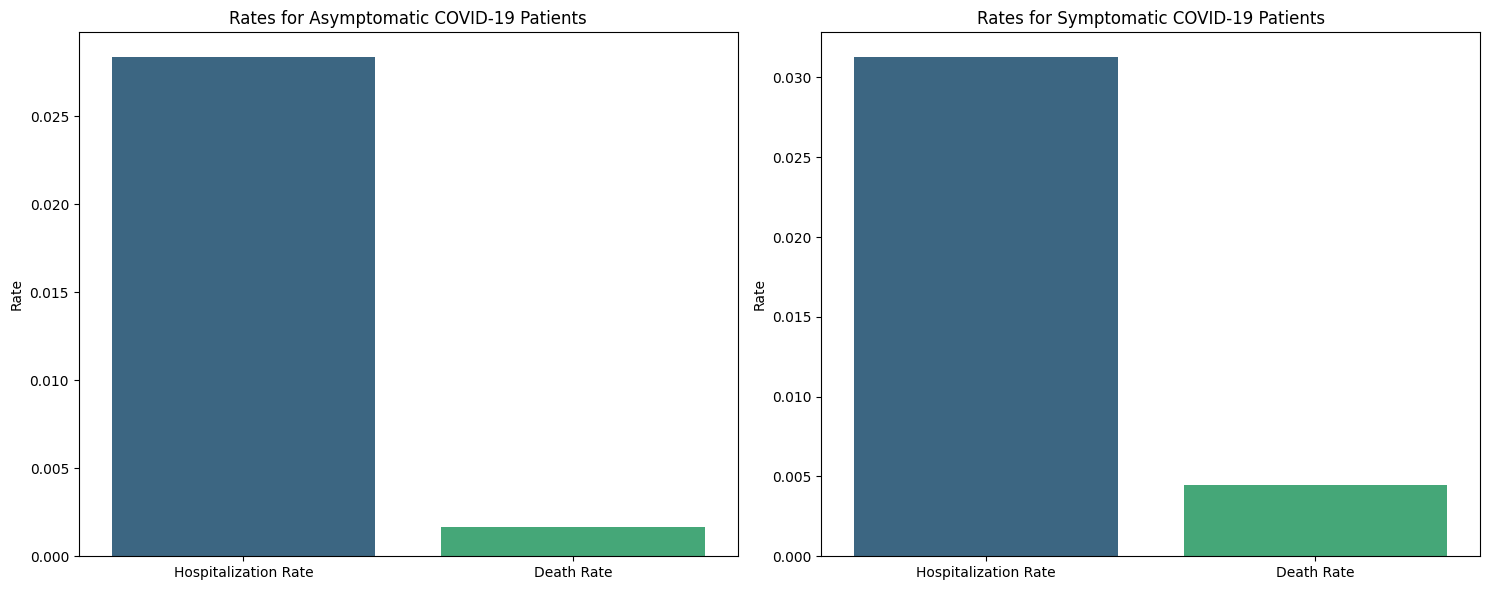

Asymptomatic hospitalization rate: 2.84%
Asymptomatic death rate: 0.17%
Symptomatic hospitalization rate: 3.13%
Symptomatic death rate: 0.45%


In [ ]:
# Create a new column for asymptomatic
cases_data['Asymptomatic'] = cases_data['symptom_status'].apply(lambda x: 1 if x == 'Asymptomatic' else 0)

# Calculate hospitalization and death rates for asymptomatic patients
asymptomatic_hospitalization_rate = cases_data[cases_data['Asymptomatic'] == 1]['Hospitalized'].mean()
symptomatic_hospitalization_rate = cases_data[cases_data['Asymptomatic'] == 0]['Hospitalized'].mean()

asymptomatic_death_rate = cases_data[cases_data['Asymptomatic'] == 1]['Death'].mean()
symptomatic_death_rate = cases_data[cases_data['Asymptomatic'] == 0]['Death'].mean()

# Visualization
labels = ['Hospitalization Rate', 'Death Rate']
asymptomatic_rates = [asymptomatic_hospitalization_rate, asymptomatic_death_rate]
symptomatic_rates = [symptomatic_hospitalization_rate, symptomatic_death_rate]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(ax=axes[0], x=labels, y=asymptomatic_rates, palette="viridis")
axes[0].set_title('Rates for Asymptomatic COVID-19 Patients')
axes[0].set_ylabel('Rate')

sns.barplot(ax=axes[1], x=labels, y=symptomatic_rates, palette="viridis")
axes[1].set_title('Rates for Symptomatic COVID-19 Patients')
axes[1].set_ylabel('Rate')

plt.tight_layout()
plt.show()

# Commentary
print(f"Asymptomatic hospitalization rate: {asymptomatic_hospitalization_rate:.2%}")
print(f"Asymptomatic death rate: {asymptomatic_death_rate:.2%}")
print(f"Symptomatic hospitalization rate: {symptomatic_hospitalization_rate:.2%}")
print(f"Symptomatic death rate: {symptomatic_death_rate:.2%}")


#### 5. Which state is associated with the highest percentage of Economic Impact (stimulus) payments among survey respondents?

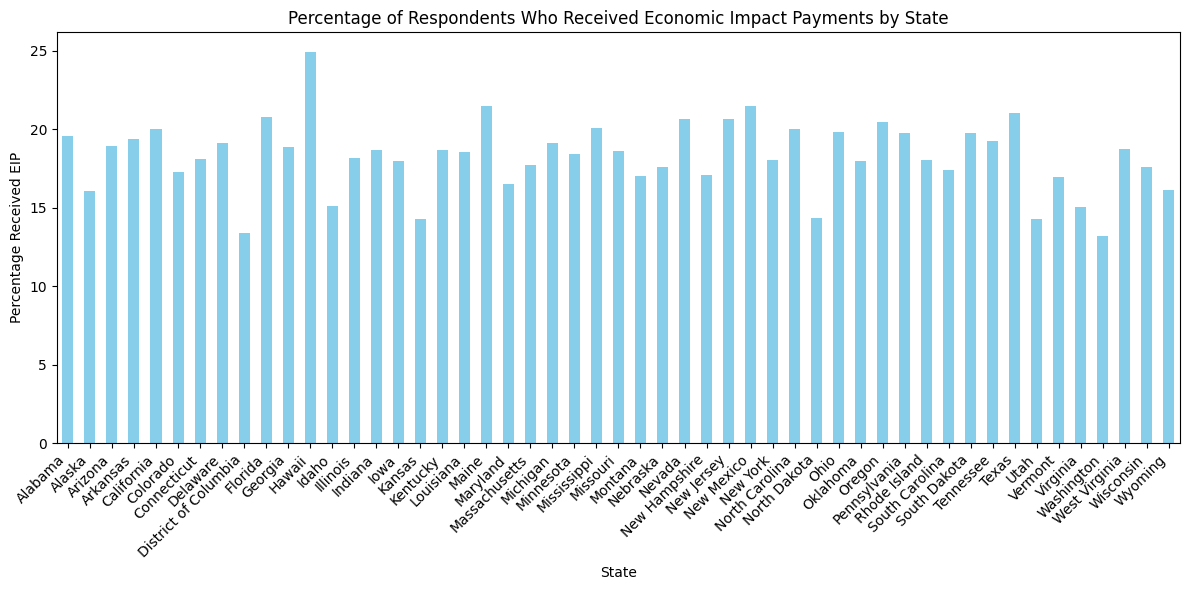

The state associated with the highest percentage of Economic Impact Payments is Hawaii with 24.93% of respondents reporting receiving EIP.


In [ ]:
cleaned_data = puf_data.dropna(subset=['state_name', 'spend_stimulus'])
cleaned_data = cleaned_data[(cleaned_data['spend_stimulus'] != -88) & (cleaned_data['spend_stimulus'] != -99)]
cleaned_data = cleaned_data[(cleaned_data['state_name'] != -88) & (cleaned_data['state_name'] != -99)]


# Group the data by state and calculate the percentage of respondents who received EIP
state_eip_percentage = puf_data.groupby('state_name')['spend_stimulus'].mean() * 100

# Find the state with the highest percentage of respondents who received EIP
state_highest_eip_percentage = state_eip_percentage.idxmax()
highest_eip_percentage = state_eip_percentage.max()

# Plot the percentage of respondents who received EIP for each state
plt.figure(figsize=(12, 6))
state_eip_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Respondents Who Received Economic Impact Payments by State')
plt.xlabel('State')
plt.ylabel('Percentage Received EIP')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print(f"The state associated with the highest percentage of Economic Impact Payments is {state_highest_eip_percentage} "
      f"with {highest_eip_percentage:.2f}% of respondents reporting receiving EIP.")

## Additional Questions

/tmp/ipykernel_34/1520485555.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['ICU'] = filtered_data['icu_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
/tmp/ipykernel_34/1520485555.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  icu_rates_by_age_group = filtered_data.groupby('age_group')['ICU'].mean().sort_index()
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current be

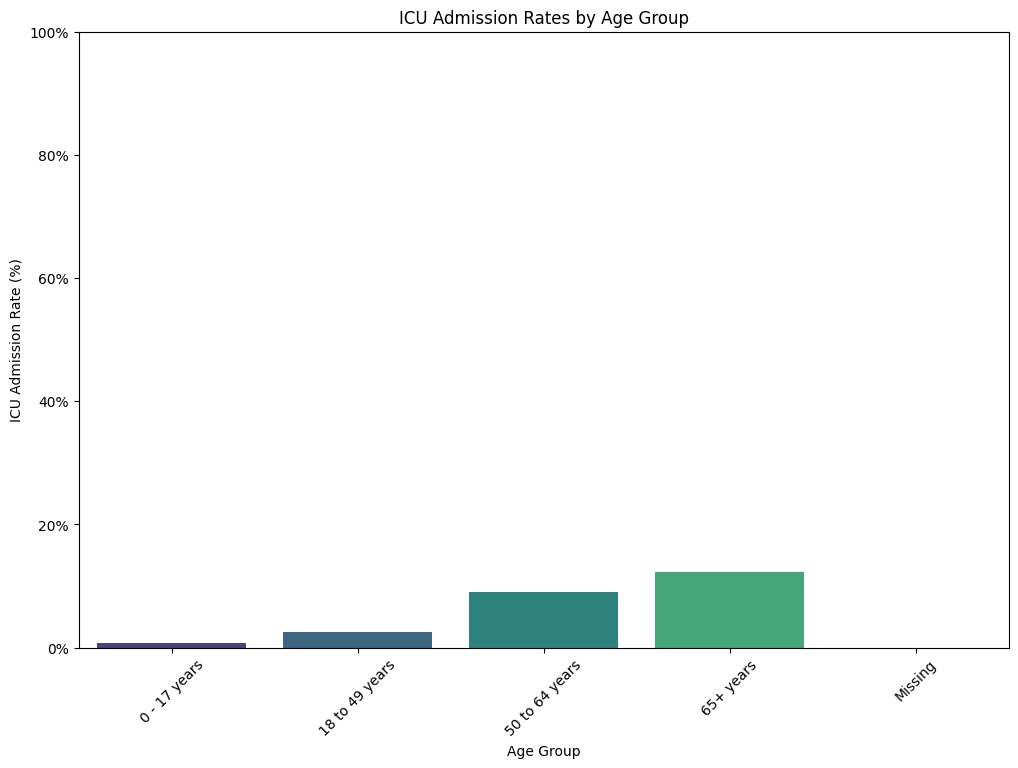

ICU admission rate for 0 - 17 years: 0.77%
ICU admission rate for 18 to 49 years: 2.51%
ICU admission rate for 50 to 64 years: 8.96%
ICU admission rate for 65+ years: 12.33%
ICU admission rate for Missing: nan%


In [ ]:
# Drop rows with 'Missing', 'Unknown', or NaN values in 'age_group' and 'icu_yn'
filtered_data = cases_data[(cases_data['age_group'].notna()) & 
                           (cases_data['icu_yn'].notna()) & 
                           (cases_data['age_group'] != 'Missing') & 
                           (cases_data['age_group'] != 'Unknown') & 
                           (cases_data['icu_yn'] != 'Missing') & 
                           (cases_data['icu_yn'] != 'Unknown')]

# Convert 'icu_yn' to binary values: 1 for 'Yes', 0 for 'No'
filtered_data['ICU'] = filtered_data['icu_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Filter out rows with missing age group
filtered_data = filtered_data[filtered_data['age_group'] != 'NA']

# Calculate ICU admission rates by age group
icu_rates_by_age_group = filtered_data.groupby('age_group')['ICU'].mean().sort_index()

# Plot the ICU admission rates
plt.figure(figsize=(12, 8))
sns.barplot(x=icu_rates_by_age_group.index, y=icu_rates_by_age_group.values, palette="viridis")
plt.title('ICU Admission Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('ICU Admission Rate (%)')
plt.xticks(rotation=45)
plt.ylim(0, 1)  # Scale from 0 to 100%
plt.gca().yaxis.set_major_formatter(plt.matplotlib.ticker.PercentFormatter(1))
plt.show()

# Commentary
for age_group, rate in icu_rates_by_age_group.items():
    print(f"ICU admission rate for {age_group}: {rate:.2%}")

#### 2. Is there a relationship between case confirmation in Examination and the severity of COVID-19 outcomes (hospitalization or death)?

/tmp/ipykernel_34/2393887715.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Confirmed'] = filtered_data['current_status'].apply(lambda x: 1 if x == 'Laboratory-confirmed case' else 0)
/tmp/ipykernel_34/2393887715.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Hospitalized'] = filtered_data['hosp_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
/tmp/ipykernel_34/2393887715.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


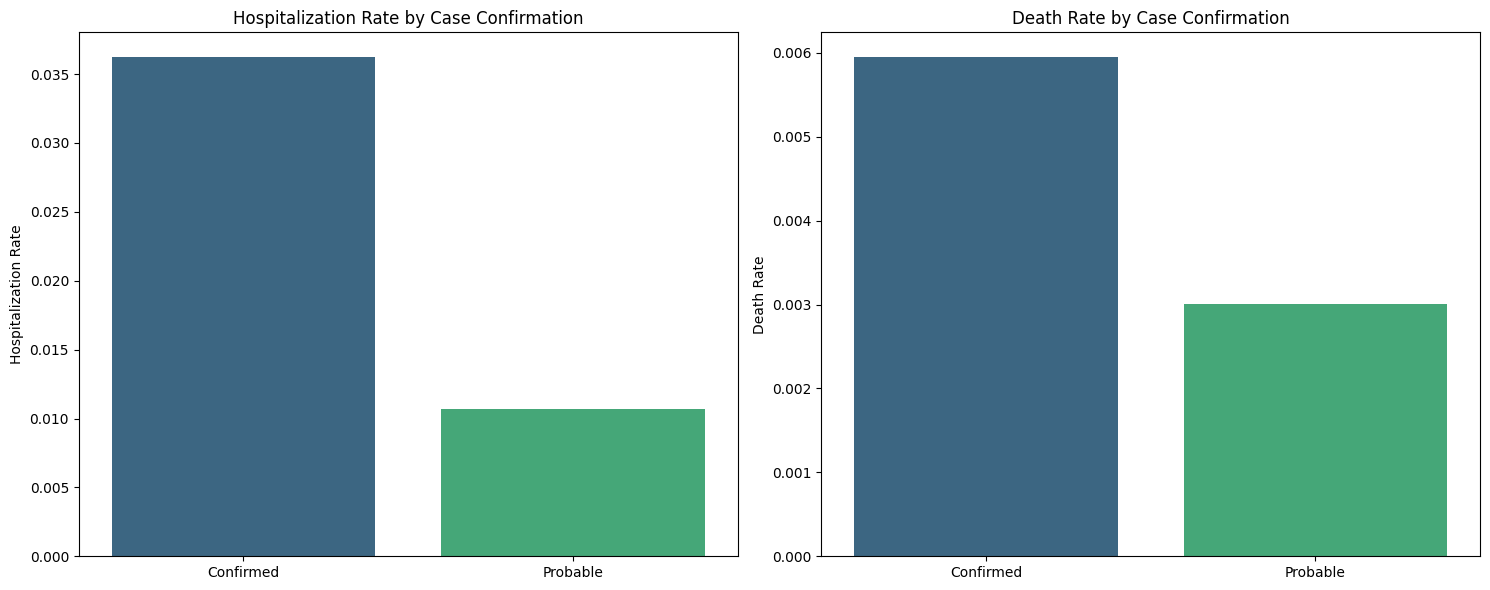

Confirmed case hospitalization rate: 3.62%
Confirmed case death rate: 0.59%
Probable case hospitalization rate: 1.07%
Probable case death rate: 0.30%

Biase due to Public Awareness and Behavior: Individuals with severe cases may be more likely to adhere to public health guidelines and seek medical care promptly, influencing the observed outcomes.


In [ ]:
# Drop rows with missing or unknown values for relevant features
filtered_data = cases_data[(cases_data['current_status'].notna()) & 
                           (cases_data['hosp_yn'].notna()) & 
                           (cases_data['death_yn'].notna()) & 
                           (cases_data['current_status'] != 'Unknown') & 
                           (cases_data['hosp_yn'] != 'Unknown') & 
                           (cases_data['death_yn'] != 'Unknown')]

# Convert current_status to binary values: 1 for 'Laboratory-confirmed case', 0 for 'Probable case'
filtered_data['Confirmed'] = filtered_data['current_status'].apply(lambda x: 1 if x == 'Laboratory-confirmed case' else 0)

# Convert hosp_yn and death_yn to binary values: 1 for 'Yes', 0 for 'No'
filtered_data['Hospitalized'] = filtered_data['hosp_yn'].apply(lambda x: 1 if x == 'Yes' else 0)
filtered_data['Death'] = filtered_data['death_yn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Calculate hospitalization and death rates for confirmed and probable cases
confirmed_hospitalization_rate = filtered_data[filtered_data['Confirmed'] == 1]['Hospitalized'].mean()
confirmed_death_rate = filtered_data[filtered_data['Confirmed'] == 1]['Death'].mean()
probable_hospitalization_rate = filtered_data[filtered_data['Confirmed'] == 0]['Hospitalized'].mean()
probable_death_rate = filtered_data[filtered_data['Confirmed'] == 0]['Death'].mean()

# Visualization
labels = ['Confirmed', 'Probable']
hospitalization_rates = [confirmed_hospitalization_rate, probable_hospitalization_rate]
death_rates = [confirmed_death_rate, probable_death_rate]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.barplot(ax=axes[0], x=labels, y=hospitalization_rates, palette="viridis")
axes[0].set_title('Hospitalization Rate by Case Confirmation')
axes[0].set_ylabel('Hospitalization Rate')

sns.barplot(ax=axes[1], x=labels, y=death_rates, palette="viridis")
axes[1].set_title('Death Rate by Case Confirmation')
axes[1].set_ylabel('Death Rate')

plt.tight_layout()
plt.show()

# Commentary
print(f"Confirmed case hospitalization rate: {confirmed_hospitalization_rate:.2%}")
print(f"Confirmed case death rate: {confirmed_death_rate:.2%}")
print(f"Probable case hospitalization rate: {probable_hospitalization_rate:.2%}")
print(f"Probable case death rate: {probable_death_rate:.2%}")

print(f"\nBiase due to Public Awareness and Behavior: Individuals with severe cases may be more likely to adhere to public health guidelines and seek medical care promptly, influencing the observed outcomes.")

#### 3.  Do married individuals experience lower levels of depression compared to those who are not married? what is the effect of having a partner on mental health?

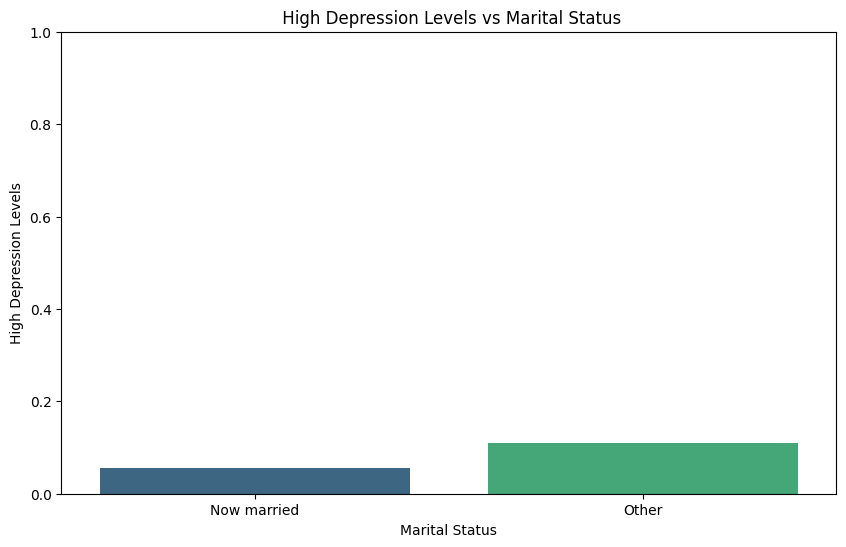

Proportion of respondents who are Now married experiencing depression nearly every day: 5.56%

While marital status alone may not directly cause depression, it could be indicative of social support structures or stressors that influence mental well-being
Proportion of respondents who are Other experiencing depression nearly every day: 10.92%

While marital status alone may not directly cause depression, it could be indicative of social support structures or stressors that influence mental well-being


In [ ]:
# Create a new column indicating whether depression is reported nearly every day
puf_data['Nearly_Every_Day_Depression'] = (puf_data['down'] == 4).astype(int)

# Define the categories for marital status
marital_status_labels = {
    1: 'Now married',
    2: 'Widowed',
    3: 'Divorced',
    4: 'Separated',
    5: 'Never married'
}
# Drop NaN, -88, and -99 values in 'ms' column
cleaned_data = puf_data.dropna(subset=['ms'])
cleaned_data = cleaned_data[(cleaned_data['ms'] != -88) & (cleaned_data['ms'] != -99)]

# Create a combined category for Widowed, Divorced, Separated, Never married
cleaned_data['Marital_Status_Combined'] = cleaned_data['ms'].map(lambda x: 'Now married' if x == 1 else 'Other')

# Filter data for the selected marital statuses
filtered_data = cleaned_data[cleaned_data['Marital_Status_Combined'].isin(['Now married', 'Other'])]

# Calculate the proportion of respondents experiencing depression nearly every day for each marital status
depression_rates = filtered_data.groupby('Marital_Status_Combined')['Nearly_Every_Day_Depression'].mean()

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=depression_rates.index, y=depression_rates.values, palette="viridis")
plt.title(' High Depression Levels vs Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('High Depression Levels')
plt.ylim(0, 1)
plt.show()

# Helpful Insights
for status, rate in depression_rates.items():
    print(f"Proportion of respondents who are {status} experiencing depression nearly every day: {rate:.2%}")
    print(f"\nWhile marital status alone may not directly cause depression, it could be indicative of social support structures or stressors that influence mental well-being")

#### 4.  How does household size impact the worry levels among survey respondents?


/tmp/ipykernel_34/2501076832.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  worried_df = cleaned_data.groupby('household_category')['worry'].mean() * 100
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


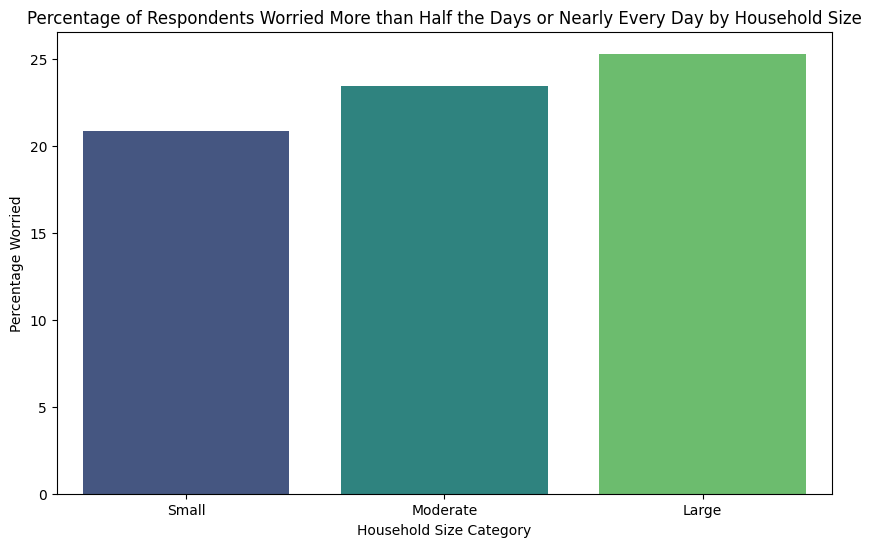

Commentary:
The bar plot illustrates the percentage of respondents who reported being worried 'More than half the days' or 'Nearly every day' across different household sizes.
The data suggests that larger households tend to have a slightly higher percentage of respondents experiencing frequent worry, with moderate-sized households following closely behind.
This finding could be attributed to various factors such as increased financial responsibilities and stressors associated with managing larger households.


In [ ]:

# Define worry labels
worry_labels = ['Not at all', 'Several days', 'More than half the days', 'Nearly every day']

# Drop NaN, -88, and -99 values in 'worry' column
cleaned_data = puf_data.dropna(subset=['worry'])
cleaned_data = cleaned_data[(cleaned_data['worry'] != -88) & (cleaned_data['worry'] != -99)]

# Combine worry levels 3 and 4
cleaned_data['worry'] = np.where(cleaned_data['worry'] >= 3, 1, 0)

# Categorize household sizes into small, moderate, and large
cleaned_data['household_category'] = pd.cut(cleaned_data['thhld_numper'], bins=[0, 3, 6, np.inf], labels=['Small', 'Moderate', 'Large'])

# Group by household size category and calculate the percentage of respondents worried
worried_df = cleaned_data.groupby('household_category')['worry'].mean() * 100

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=worried_df.index, y=worried_df.values, palette='viridis')
plt.title('Percentage of Respondents Worried More than Half the Days or Nearly Every Day by Household Size')
plt.xlabel('Household Size Category')
plt.ylabel('Percentage Worried')
plt.show()

# Commentary
print("Commentary:")
print("The bar plot illustrates the percentage of respondents who reported being worried 'More than half the days' or 'Nearly every day' across different household sizes.")
print("The data suggests that larger households tend to have a slightly higher percentage of respondents experiencing frequent worry, with moderate-sized households following closely behind.")
print("This finding could be attributed to various factors such as increased financial responsibilities and stressors associated with managing larger households.")


#### 5. Evaluating the readiness of those who switched to remote online learning based on internet availability?

# **Part 3: Hypothesis Testing**

## 3.1 Formulate a hypothesis test to assess the validity of this claim given the available data:

In [ ]:
patient_demographics=cases_data[['age_group','sex','race','death_yn']]
patient_demographics = patient_demographics[(patient_demographics['death_yn'] != 'Unknown') & (patient_demographics['death_yn'] != 'Missing')]
patient_demographics.head()


,age_group,sex,race,death_yn
0,18 to 49 years,Female,Unknown,No
4,65+ years,Female,White,No
8,18 to 49 years,Female,Unknown,No
10,18 to 49 years,Female,Black,No
12,18 to 49 years,Female,White,No


### State the test you will use and justify your choice.

In our study, we're examining whether there is a strong association between the probability of death due to COVID-19 and various patient demographics. Since all the demographic attributes are categorical, the most appropriate statistical test to use is the Chi-Square test


### Clearly state the hypotheses.

**Null Hypothesis (H₀):** There is no association between the probability of death due to COVID-19 and various patient demographics.

**Alternative Hypothesis (H₁):** There is an association between the probability of death due to COVID-19 and various patient demographics.

### Conduct the test and report the result.

In [ ]:
# Combine attributes into a single categorical variable
combined_group = patient_demographics.apply(lambda row: f"{row['age_group']}_{row['race']}_{row['sex']}", axis=1)


In [ ]:
observed_freq = pd.crosstab(combined_group, patient_demographics['death_yn'], margins=False)
observed_freq.head(10)

death_yn,No,Yes
row_0,,
0 - 17 years_American Indian/Alaska Native_Female,1855,0
0 - 17 years_American Indian/Alaska Native_Male,1996,0
0 - 17 years_American Indian/Alaska Native_Unknown,9,0
0 - 17 years_Asian_Female,9396,0
0 - 17 years_Asian_Male,10265,0
0 - 17 years_Asian_Missing,1,0
0 - 17 years_Asian_Unknown,34,0
0 - 17 years_Black_Female,55568,0
0 - 17 years_Black_Male,55336,0


In [ ]:
test_result = stats.chi2_contingency(observed_freq)
test_result.statistic, test_result.pvalue

(435982.3969256087, 0.0)

### Make a conclusion as to the validity of the claim, assume a significance level of 0.05.


**Comments**
* p-value < 0.05 the significance level which impluse that we hav statstically enough evadiance to reject the null hyposisthe and say that There is an association between the probability of death due to COVID-19 and various patient demographics.


## 3.2 Come up with your own claim from the available data and conduct a hypothesis test for it following in the same steps.

**Claim: The COVID-19 death rate varies significantly among different countries, suggesting that geographical differences impact mortality outcomes.**

### State the test you will use and justify your choice.

In our study, we aim to determine if there is a significant association between the likelihood of mortality from COVID-19 and the country of the patients. Given that the attribute for countries is categorical, we have selected the Chi-Square test as the most appropriate statistical method for this analysis.

### Clearly state the hypotheses.

**Null Hypothesis (H₀):** There is no association between the country (or state) and the death rate from COVID-19. That is, death rates are similar across different countries (or states), regardless of location.

**Alternative Hypothesis (H₁):** There is an association between the country (or state) and the death rate from COVID-19, indicating that death rates vary significantly by location.

### Conduct the test and report the result.

In [ ]:
# Combine attributes into a single categorical variable
countries_death=cases_data[['res_county','death_yn']]
countries_death = countries_death[(countries_death['death_yn'] != 'Unknown') & (countries_death['death_yn'] != 'Missing')]
countries_death.head()

,res_county,death_yn
0,HENNEPIN,No
4,MIDDLESEX,No
8,HENNEPIN,No
10,BROWARD,No
12,MIAMI-DADE,No


In [ ]:
observed_freq = pd.crosstab(countries_death.res_county, countries_death['death_yn'], margins=False)
observed_freq.head(10)

death_yn,No,Yes
res_county,,
ABBEVILLE,160,0
ACADIA,0,3
ACCOMACK,1099,0
ADA,28328,99
ADAIR,308,0
ADAMS,4133,134
ADDISON,361,0
AIKEN,2387,14
ALACHUA,6474,41


In [ ]:
test_result = stats.chi2_contingency(observed_freq)
test_result.statistic, test_result.pvalue

(1532638.949378272, 0.0)

### Make a conclusion as to the validity of the claim, assume a significance level of 0.05.


**Comments**
* p-value < 0.05 the significance level which impluse that we hav statstically enough evadiance to reject the null hyposisthe and say There is an association between the country (or state) and the death rate from COVID-19, indicating that death rates vary significantly by location.


# Regression Analysis:

In [ ]:
null_counts = cases_data.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
case_month                                0
res_state                               340
state_fips_code                         340
res_county                          1358039
county_fips_code                    1358039
age_group                            202024
sex                                  630216
race                                3086509
ethnicity                           3461742
case_positive_specimen_interval    11015534
case_onset_interval                12083897
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                             616506
underlying_conditions_yn           18320594
dtype: int64


In [ ]:
# Drop rows with any missing values
data = cases_data.dropna(subset=['hosp_yn','icu_yn','case_month' ,'age_group','sex','death_yn'])
null_counts = data.isnull().sum()
print("Null values in each column:")
print(null_counts)

Null values in each column:
case_month                                0
res_state                                 1
state_fips_code                           1
res_county                          1232682
county_fips_code                    1232682
age_group                                 0
sex                                       0
race                                2341964
ethnicity                           2653656
case_positive_specimen_interval    10348275
case_onset_interval                11417781
process                                   0
exposure_yn                               0
current_status                            0
symptom_status                            0
hosp_yn                                   0
icu_yn                                    0
death_yn                                  0
underlying_conditions_yn           17246392
dtype: int64


In [ ]:
features = ['hosp_yn','icu_yn','case_month' ,'age_group','sex','death_yn']
sub_data = data[features]
sub_data.head()

,hosp_yn,icu_yn,case_month,age_group,sex,death_yn
0,Missing,Missing,2020-12,18 to 49 years,Female,No
1,Missing,Missing,2022-02,18 to 49 years,Female,Unknown
2,No,Missing,2022-01,18 to 49 years,Male,Missing
3,Missing,Missing,2022-01,18 to 49 years,Male,Missing
4,No,Missing,2020-05,65+ years,Female,No


In [ ]:
proportions = sub_data['age_group'].value_counts(normalize=True)
print("\nProportions:\n", proportions)


Proportions:
 age_group
18 to 49 years    0.506252
50 to 64 years    0.181837
0 - 17 years      0.166074
65+ years         0.135271
Missing           0.010566
Name: proportion, dtype: float64


In [ ]:
data_cleaned = sub_data.drop(sub_data[sub_data['age_group'] == 'Missing'].index)
data_cleaned['age_group'].value_counts()

age_group
18 to 49 years    9042177
50 to 64 years    3247789
0 - 17 years      2966248
65+ years         2416068
Name: count, dtype: int64

In [ ]:
proportions = data_cleaned['sex'].value_counts(normalize=True)
print("\nProportions:\n", proportions)


Proportions:
 sex
Female     0.536590
Male       0.451649
Unknown    0.007612
Missing    0.004136
Other      0.000013
Name: proportion, dtype: float64


In [ ]:
values_to_delete = ['Missing', 'Unknown' , 'Other']

data_cleaned = data_cleaned[~data_cleaned['sex'].isin(values_to_delete)]

data_cleaned['sex'].value_counts()

sex
Female    9482768
Male      7981676
Name: count, dtype: int64

In [ ]:
data_cleaned['icu_yn'].value_counts()

icu_yn
Missing    15102638
Unknown     1832931
No           499830
Yes           29045
Name: count, dtype: int64

In [ ]:
data_cleaned['hosp_yn'].value_counts()

hosp_yn
Missing    8514588
No         5578032
Unknown    2870370
Yes         501454
Name: count, dtype: int64

In [ ]:
data_cleaned['death_yn'].value_counts()

death_yn
Missing    9524377
No         5447106
Unknown    2409487
Yes          83474
Name: count, dtype: int64

In [ ]:
import gc

# Delete the dataframe
del cases_data
del data

# Call the garbage collector
gc.collect()

0

In [ ]:
gender_distribution = data_cleaned.groupby(['case_month', 'sex']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
age_distribution = data_cleaned.groupby(['case_month', 'age_group']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
icu_proportion = data_cleaned.groupby('case_month')['icu_yn'].value_counts(normalize=True).unstack().rename(columns={
    'Yes': 'icu_Yes', 'No': 'icu_No', 'Unknown': 'icu_Unknown', 'Missing': 'icu_Missing'
})
hospitalized_proportion = data_cleaned.groupby('case_month')['hosp_yn'].value_counts(normalize=True).unstack().rename(columns={
    'Yes': 'hosp_Yes', 'No': 'hosp_No', 'Unknown': 'hosp_Unknown', 'Missing': 'hosp_Missing'
})
death_proportion = data_cleaned.groupby('case_month')['death_yn'].apply(lambda x: (x == 'Yes').mean())

In [ ]:
# Convert indices to columns
gender_distribution = gender_distribution.reset_index()
age_distribution = age_distribution.reset_index()
icu_proportion = icu_proportion.reset_index()
hospitalized_proportion = hospitalized_proportion.reset_index()
death_proportion = death_proportion.reset_index()

In [ ]:
# Merge DataFrames on 'case_month'
combined_df = gender_distribution.merge(age_distribution, on='case_month')
combined_df = combined_df.merge(icu_proportion, on='case_month')
combined_df = combined_df.merge(hospitalized_proportion, on='case_month')
combined_df = combined_df.merge(death_proportion, on='case_month')

In [ ]:
combined = combined_df.drop(columns=['case_month'])
combined = combined.fillna(0)

## First Model :

In [ ]:
import statsmodels.api as sm

X = combined.drop(columns=['death_yn'])
Y = combined['death_yn']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y , X).fit()

# Print the model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               death_yn   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.99
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.29e-09
Time:                        12:14:01   Log-Likelihood:                 115.36
No. Observations:                  51   AIC:                            -208.7
Df Residuals:                      40   BIC:                            -187.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4725      0.569      2.

### Identifying Good and Bad Predictors
#### Predictors with p-values less than 0.05 are considered statistically significant and are thus good predictors:
1. Male (p-value: 0.000)
2. 18-49 years (p-value: 0.000)
3. 50-64 years (p-value: 0.000)
4. 65+ years (p-value: 0.000)
5. icu_No (p-value: 0.000)
6. icu_Unknown (p-value: 0.040)
7. icu_Yes (p-value: 0.005)
8. icu_Missing (p-value: 0.014)
9. hosp_No (p-value: 0.029)
10. hosp_missing (p-value: 0.016)

### Predictors with p-values greater than or equal to 0.05 are considered not statistically significant and are thus bad predictors:
1. Female (p-value: 0.145)
2. 0-17 years (p-value: 0.504)
3. hosp_Yes (p-value: 0.132)
4. hosp_unknown (p-value: 0.074) 

## Are any of these predictors correlated with each other?

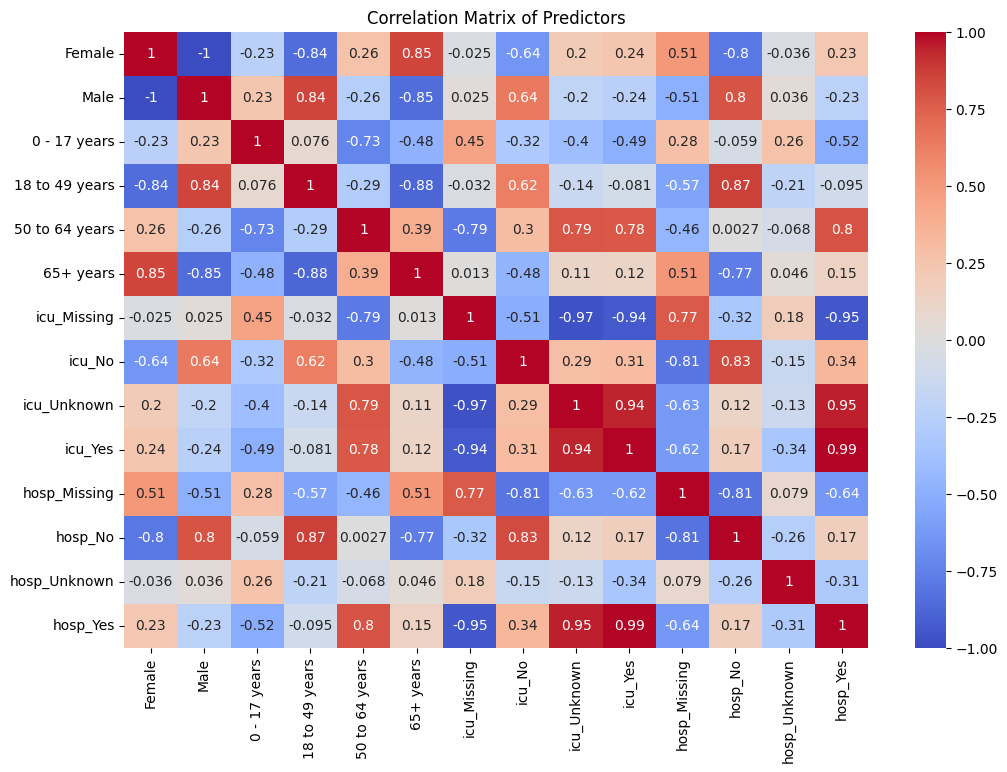

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


X = combined.drop(columns=['death_yn'])

# Calculate the correlation matrix
correlation_matrix = X.corr()


# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Predictors')
plt.show()

### from the Correlation matrix we can optain that there are some predictors are corralated :
* Female and Male
* icu_Missing and icu_Unknown
* icu_Unknown and icu_Yes
* icu_Yes and hosp_Yes
* icu_No and hosp_No
* 65+ years and Female
* 50 to 64 years and Male
* 18 to 49 years and Female

* there are some clear relation between some of the correlated predictors as "females and males" they are the same variable and completely inversed.

* and there are some predictors there relation is positive although they are the same variable but it could be due to the total increase in the cases in that specific month

## Second Model (Remove the Intercept)

In [ ]:
# Fit the regression model without intercept
model_without_intercept = sm.OLS(Y, X).fit()

# Print the model summary
print(model_without_intercept.summary())

                            OLS Regression Results                            
Dep. Variable:               death_yn   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     11.99
Date:                Thu, 23 May 2024   Prob (F-statistic):           3.29e-09
Time:                        12:23:27   Log-Likelihood:                 115.36
No. Observations:                  51   AIC:                            -208.7
Df Residuals:                      40   BIC:                            -187.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Female             0.1620      0.487      0.

## Analysis of the Model After Removing the Intercept
### R-squared :
 0.750 " the same as the model with the intercept "
 
### Significance of Predictors:
### Significant Predictors
* Male (p-value: 0.000)
* 18-49 years (p-value: 0.000)
* 50 to 64 years (p-value: 0.024)
* 65+ years (p-value: 0.000)
* icu_Missing (p-value: 0.014)
* icu_No (p-value: 0.000)
* icu_Unknown (p-value: 0.028)
* icu_Yes (p-value: 0.005)
* hosp_Missing (p-value: 0.015)
* hosp_No (p-value: 0.022)
* hosp_Unknown (p-value: 0.048)


## Model 3 (Remove Outliers)

In [ ]:
from scipy import stats

model_residuals = model.resid

# Calculate IQR for residuals
Q1 = model_residuals.quantile(0.25)
Q3 = model_residuals.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers (e.g., 1.5 times the IQR)
threshold = 1.5
outliers = model_residuals[(model_residuals < (Q1 - threshold * IQR)) | (model_residuals > (Q3 + threshold * IQR))]

# Remove outliers from the dataset
X_no_outliers = X.drop(outliers.index)
y_no_outliers = Y.drop(outliers.index)

# Fit the regression model without outliers
model_no_outliers = sm.OLS(y_no_outliers, sm.add_constant(X_no_outliers)).fit()

# Print the model summary
print(model_no_outliers.summary())

                            OLS Regression Results                            
Dep. Variable:               death_yn   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     110.1
Date:                Thu, 23 May 2024   Prob (F-statistic):           2.23e-25
Time:                        12:24:35   Log-Likelihood:                 208.36
No. Observations:                  50   AIC:                            -394.7
Df Residuals:                      39   BIC:                            -373.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3481      0.095     -3.

## Analysis of the Model After Removing Outliers
### R-squared : 
0.966 ==> About 96.6% of the variability in the target variable (death proportion) is explained by the model." better than the model with the outliers "

### Significant Predictors
* Const (p-value: 0.001)
* Female (p-value: 0.000)
* 0-17 years (p-value: 0.000)
* 18-49 years (p-value: 0.009)
* 65+ years (p-value: 0.015)
* icu_Missing (p-value: 0.000)
* icu_No (p-value: 0.000)
* icu_Unknown (p-value: 0.000)
* icu_Yes (p-value: 0.000)
* hosp_Missing (p-value: 0.000)
* hosp_No (p-value: 0.000)
* hosp_Unknown (p-value: 0.000)
* hosp_Yes (p-value: 0.000)

more significant predictors than the model with the outliers

## Model 4 (Introduce higher order terms) : 

In [ ]:
# Choosing sone significant predictors to add the higher order terms
X['18_49_years_squared'] = X['18 to 49 years'] ** 2
X['icu_No_squared'] = X['icu_No'] ** 2
X['hosp_No_squared'] = X['hosp_No'] ** 2

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model with higher-order terms
model_with_quadratic = sm.OLS(Y, X).fit()

# Print the model summary
print(model_with_quadratic.summary())

                            OLS Regression Results                            
Dep. Variable:               death_yn   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     18.77
Date:                Thu, 23 May 2024   Prob (F-statistic):           1.92e-12
Time:                        12:27:48   Log-Likelihood:                 131.72
No. Observations:                  51   AIC:                            -235.4
Df Residuals:                      37   BIC:                            -208.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.1379    

## Analysis of the Model After Adding Higher Order Terms :
### R-squared : 
0.868 ==> About 86.6% of the variability in the target variable (death proportion) is explained by the model." better than the model with the outliers "

### Significant Predictors
* const
* Male
* 0-17 years
* 18-49 years
* 50-64 years
* icu_No
* icu_Missing
* icu_Yes
* hosp_Missing
* hosp_No
* 18_49_years_squared

## non-significant predictors
* Female
* icu_Unknown
* 65+ years
* hosp_Unknown
* hosp_Yes
* icu_No_squared
* hosp_No_squared

In [ ]:
nulls=df_copy['death_yn'].isnull().sum()
missing=df_copy[df_copy["death_yn"] == "Missing"].shape[0]
Unknown=df_copy[df_copy["death_yn"] == "Unknown"].shape[0]
print(f'number of nulls in the target {nulls},number of missing values in {missing} and Number of Unknown {Unknown}')

number of nulls in the target 616506,number of missing values in 10137522 and Number of Unknown 2518342


### **dropping rows of nulls,missing and unkown in the death_yn**

In [ ]:
df_copy = df_copy.dropna(subset=['death_yn'])
df_copy = df_copy[(df_copy["death_yn"] != "Missing") & (df_copy["death_yn"] != "Unknown")]
df_copy.isnull().sum()

case_month                               0
res_state                               84
state_fips_code                         84
res_county                          298686
county_fips_code                    298686
age_group                            58750
sex                                 182303
race                                840096
ethnicity                           923570
case_positive_specimen_interval    2590466
case_onset_interval                3180408
process                                  0
exposure_yn                              0
current_status                           0
symptom_status                           0
hosp_yn                                  0
icu_yn                                   0
death_yn                                 0
underlying_conditions_yn           5358777
dtype: int64

In [ ]:
df_copy.head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
4,2020-05,MA,25.0,MIDDLESEX,25017.0,65+ years,Female,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
8,2020-12,MN,27.0,HENNEPIN,27053.0,18 to 49 years,Female,Unknown,Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
10,2021-02,FL,12.0,BROWARD,12011.0,18 to 49 years,Female,Black,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
12,2021-04,FL,12.0,MIAMI-DADE,12086.0,18 to 49 years,Female,White,Hispanic/Latino,1.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


## **Imputation**

In [ ]:
for column in df_copy.columns:
    if df_copy[column].dtype=="object":
        df_copy[column]=df_copy[column].fillna( df_copy[column].mode()[0])
    else:
        df_copy[column]=df_copy[column].fillna(df_copy[column].mean())

In [ ]:
df_copy.isnull().sum()

case_month                         0
res_state                          0
state_fips_code                    0
res_county                         0
county_fips_code                   0
age_group                          0
sex                                0
race                               0
ethnicity                          0
case_positive_specimen_interval    0
case_onset_interval                0
process                            0
exposure_yn                        0
current_status                     0
symptom_status                     0
hosp_yn                            0
icu_yn                             0
death_yn                           0
underlying_conditions_yn           0
dtype: int64

## **Target Attributes Relationships Graphs**

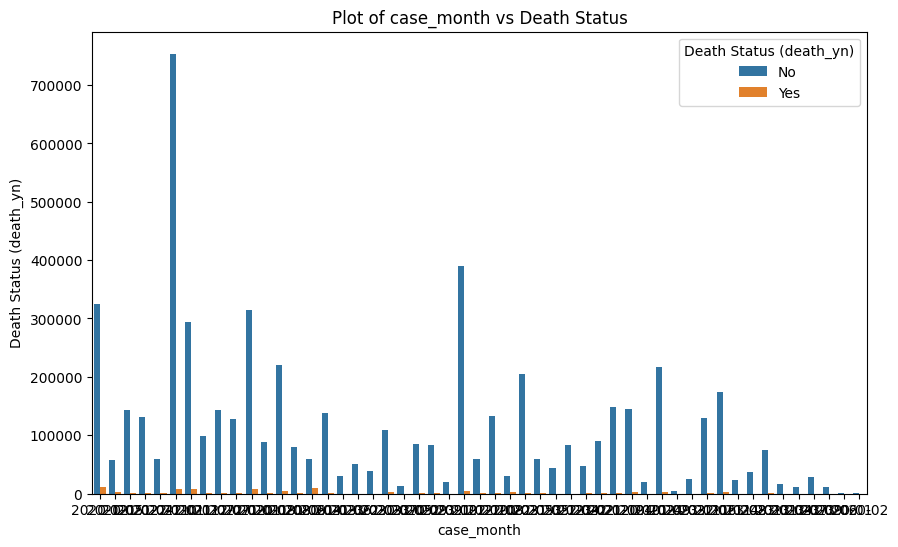

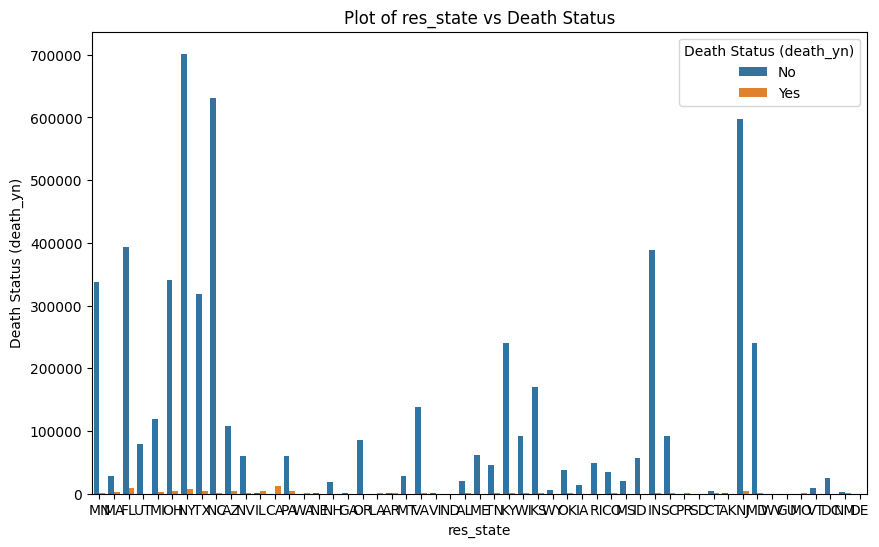

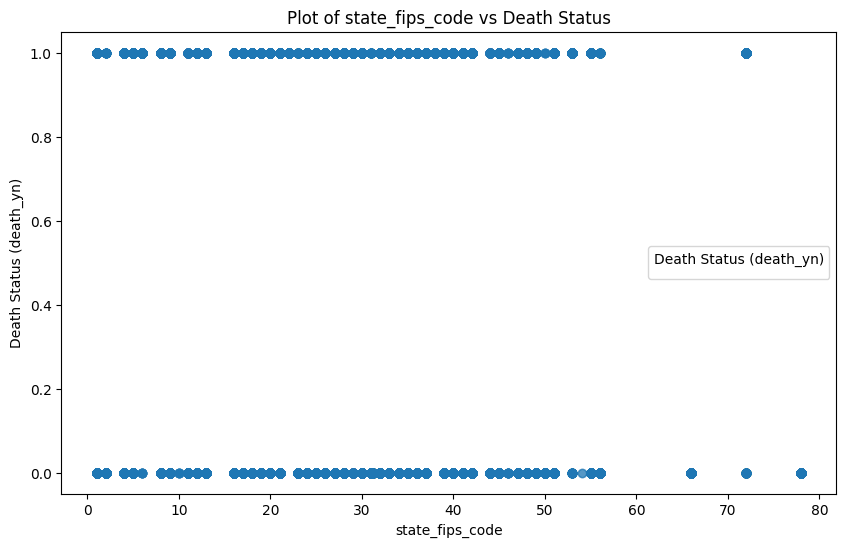

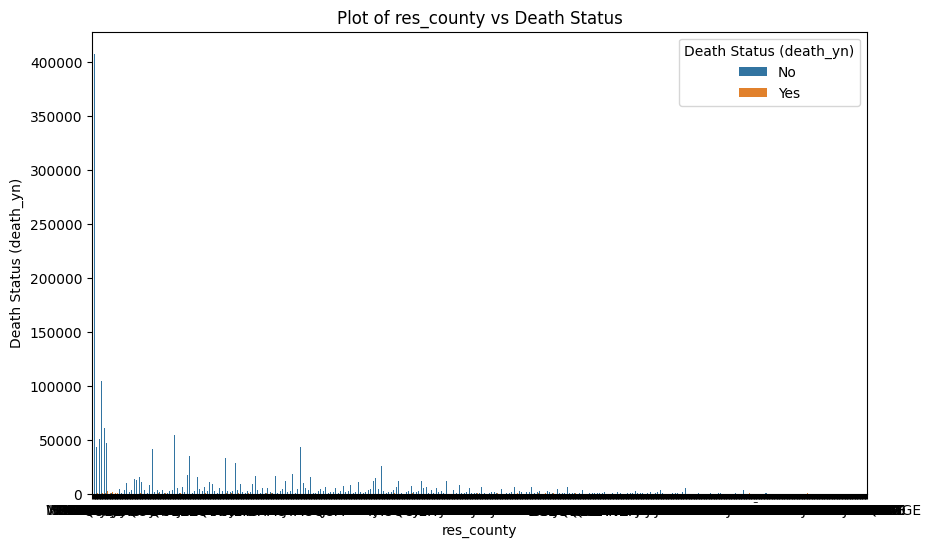

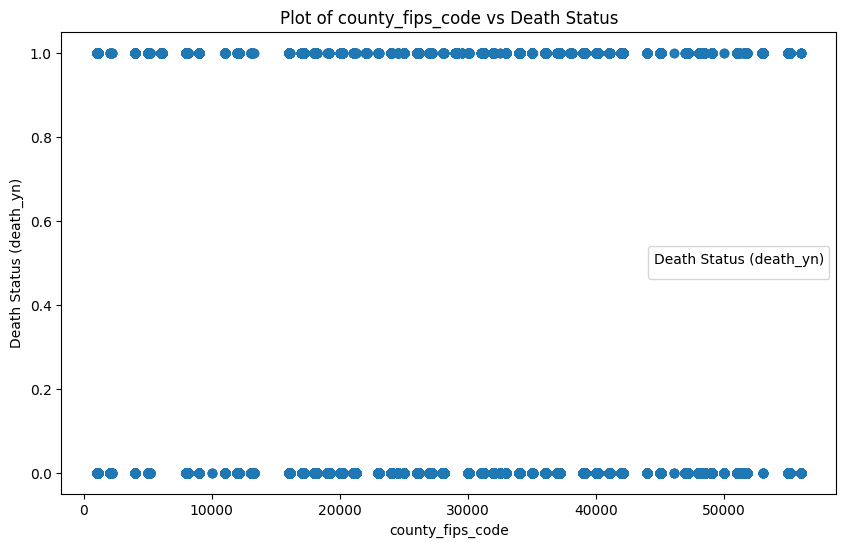

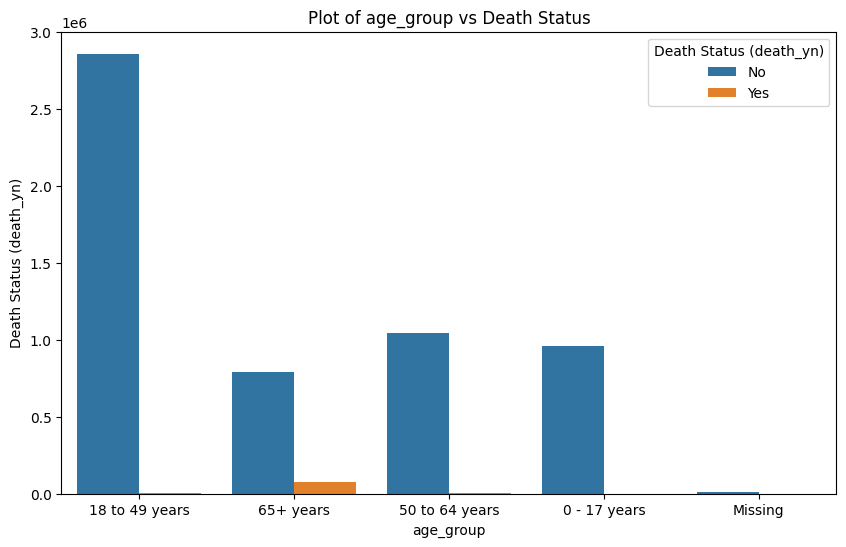

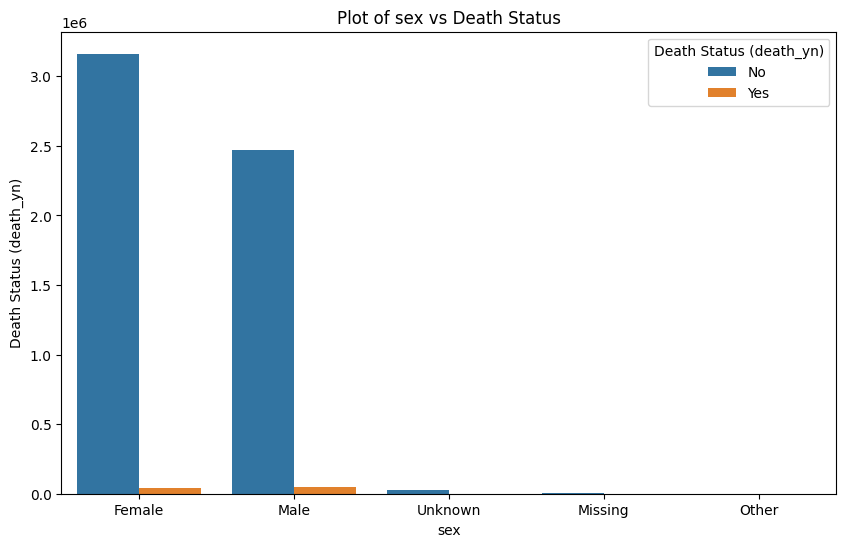

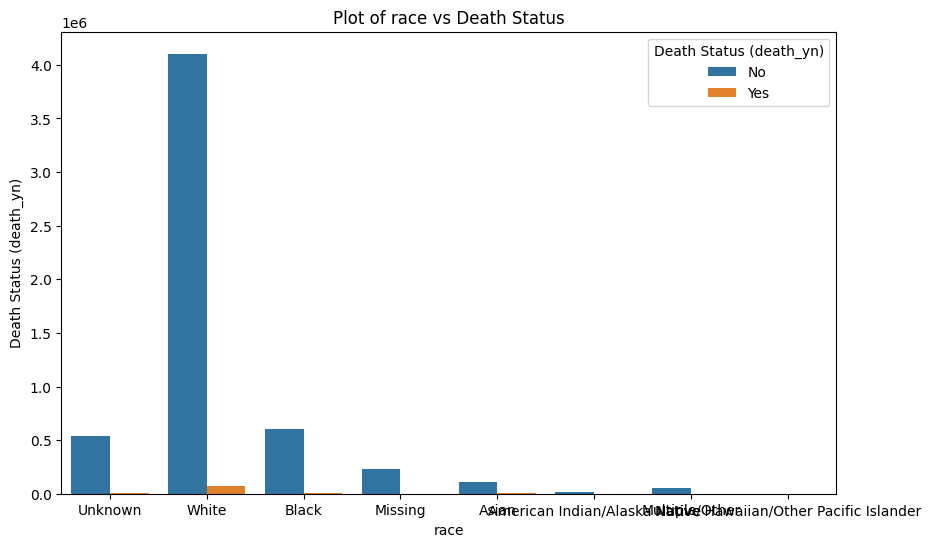

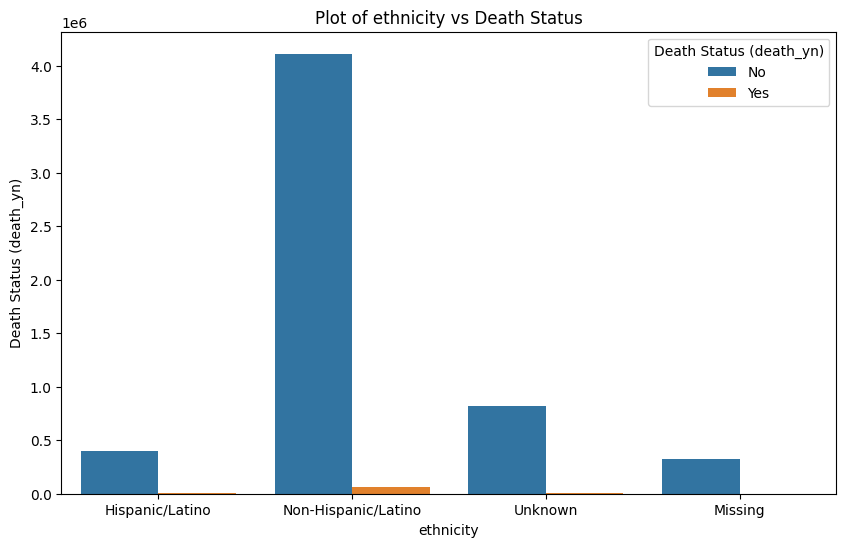

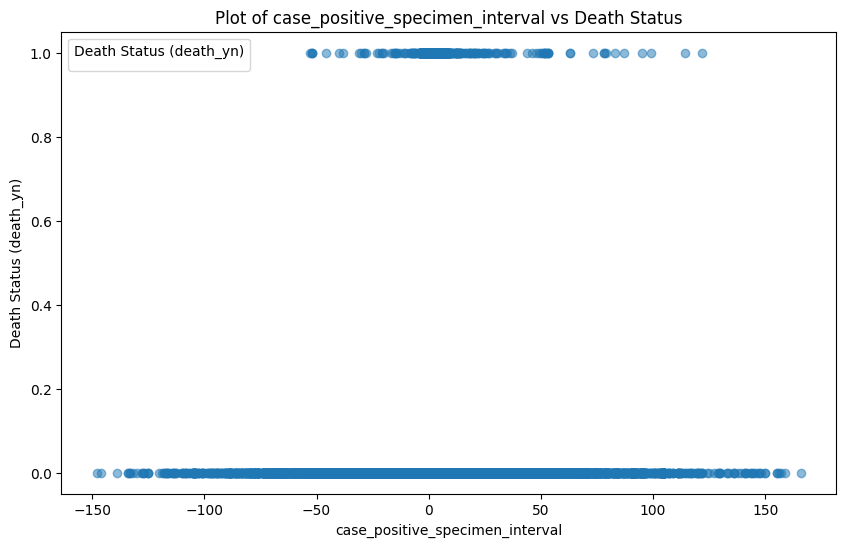

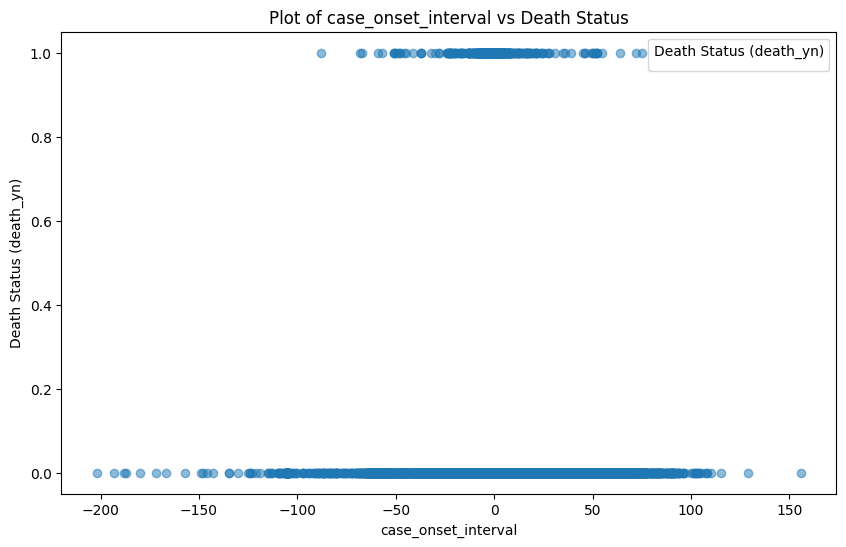

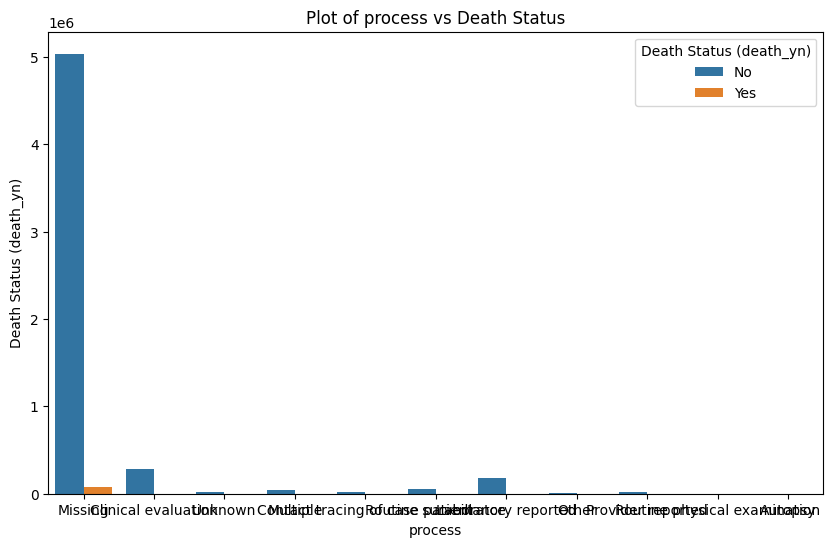

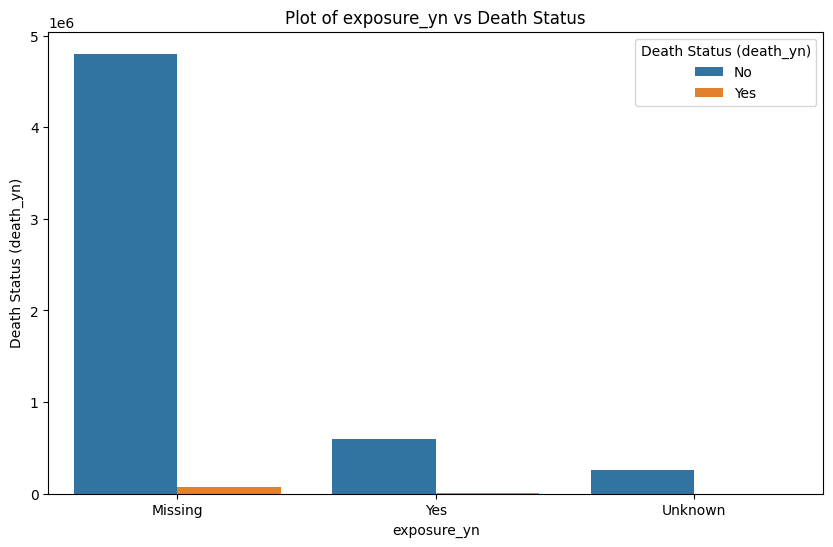

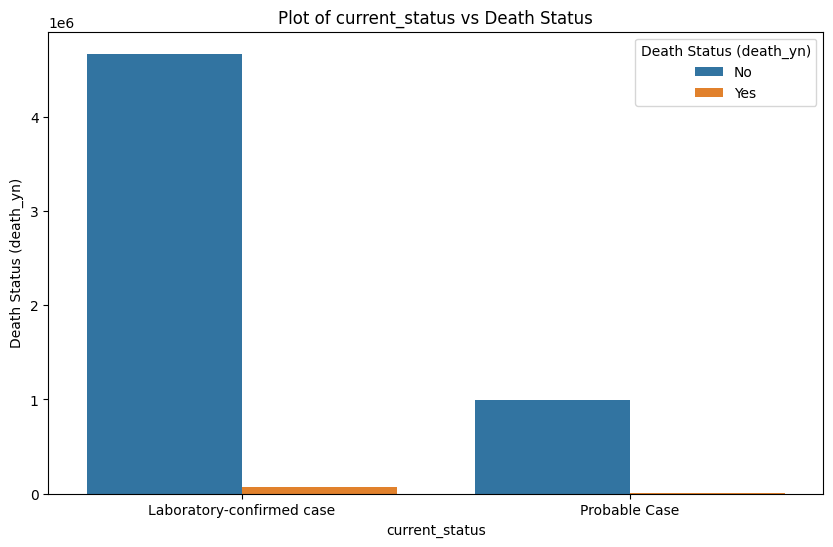

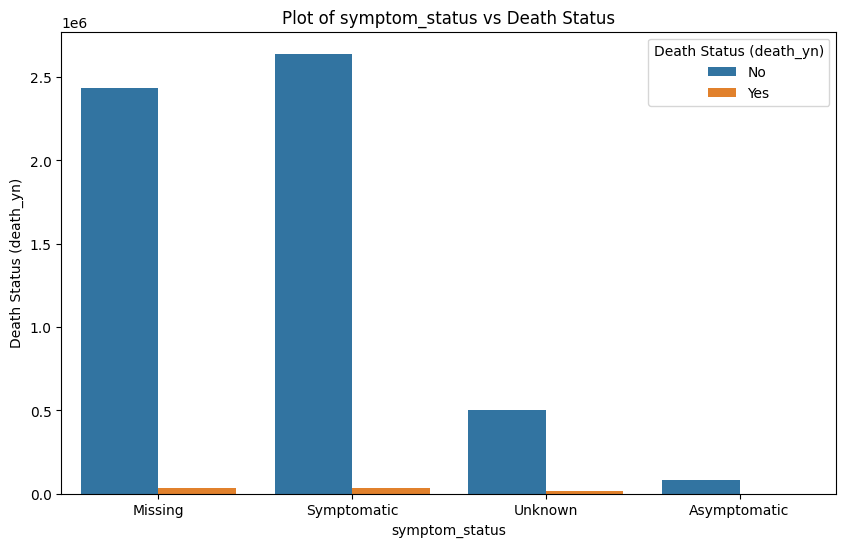

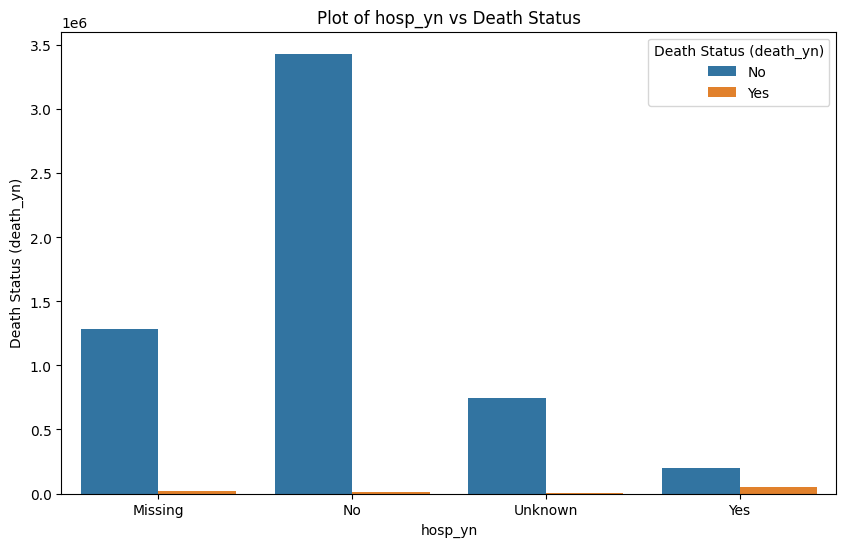

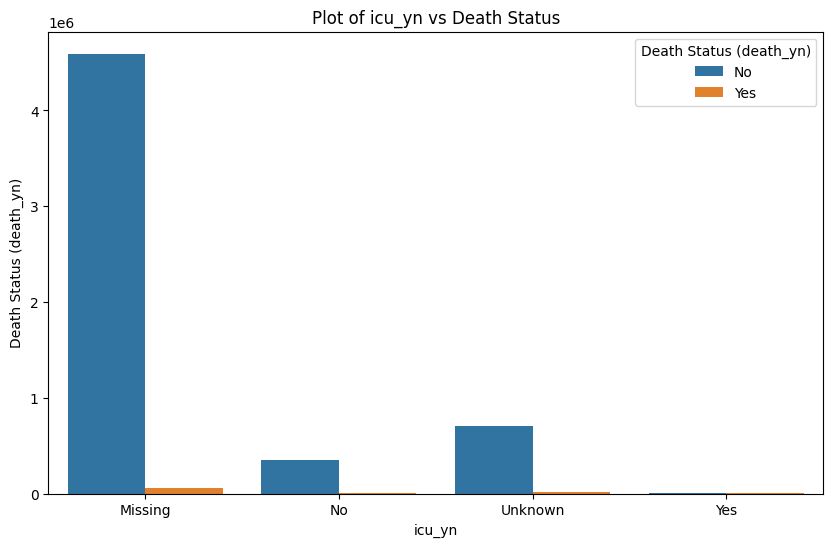

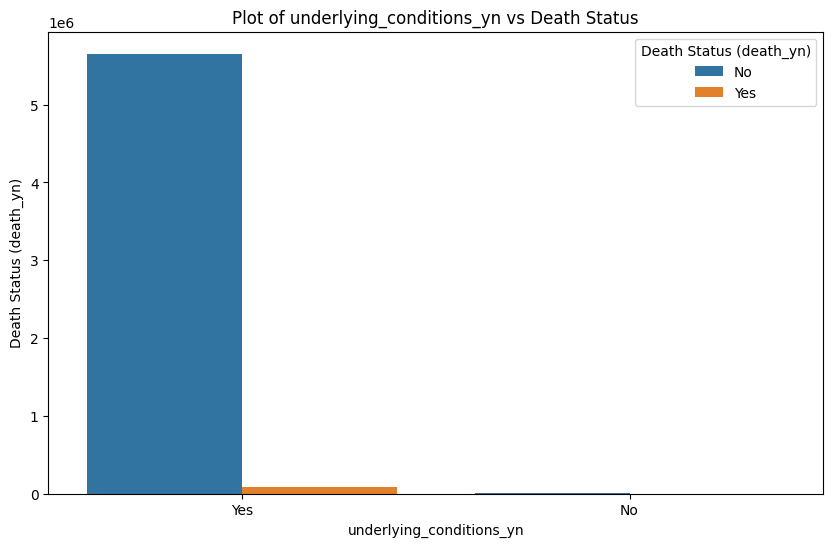

In [ ]:
import seaborn as sns

# Create a copy of the 'death_yn' column converted to numerical codes
death_yn_numeric = df_copy['death_yn'].astype('category').cat.codes

# List of attributes to plot, excluding 'death_yn'
attributes = df_copy.columns.drop('death_yn')

# Create plots for each attribute against the target variable
for attr in attributes:
    plt.figure(figsize=(10, 6))
    if df_copy[attr].dtype == 'object' or df[attr].dtype.name == 'category':
        # Use a count plot for categorical attributes
        sns.countplot(data=df_copy, x=attr, hue='death_yn')
        plt.xlabel(attr)
    else:
        # Use a scatter plot for numerical attributes
        plt.scatter(df_copy[attr], death_yn_numeric, alpha=0.5)
        plt.xlabel(attr)
    plt.title(f'Plot of {attr} vs Death Status')
    plt.ylabel('Death Status (death_yn)')
    plt.legend(title='Death Status (death_yn)')
    plt.show()


### **Correlation**

In [ ]:
random_sample = df_copy.sample(frac=0.08, random_state=42)  # Set random_state for reproducibility
random_sample.shape[0]

459887

In [ ]:
# Apply label encoding to categorical columns
label_encoders = {}
le = LabelEncoder()
for column in random_sample.select_dtypes(include=['object']).columns:
    
    random_sample[column] = le.fit_transform(random_sample[column])

# Calculate the correlation matrix
corr = random_sample.corr()
print(corr)

                                 case_month  res_state  state_fips_code  \
case_month                         1.000000   0.022014         0.023878   
res_state                          0.022014   1.000000         0.979562   
state_fips_code                    0.023878   0.979562         1.000000   
res_county                         0.016789   0.043140         0.036569   
county_fips_code                   0.017213   0.948889         0.966839   
age_group                          0.050369  -0.018474        -0.023460   
sex                               -0.034710   0.020361         0.016704   
race                              -0.024380  -0.043012        -0.047880   
ethnicity                          0.023709   0.134240         0.142878   
case_positive_specimen_interval   -0.059072   0.020177         0.016171   
case_onset_interval               -0.009145  -0.059289        -0.057150   
process                           -0.001270   0.058179         0.051105   
exposure_yn              

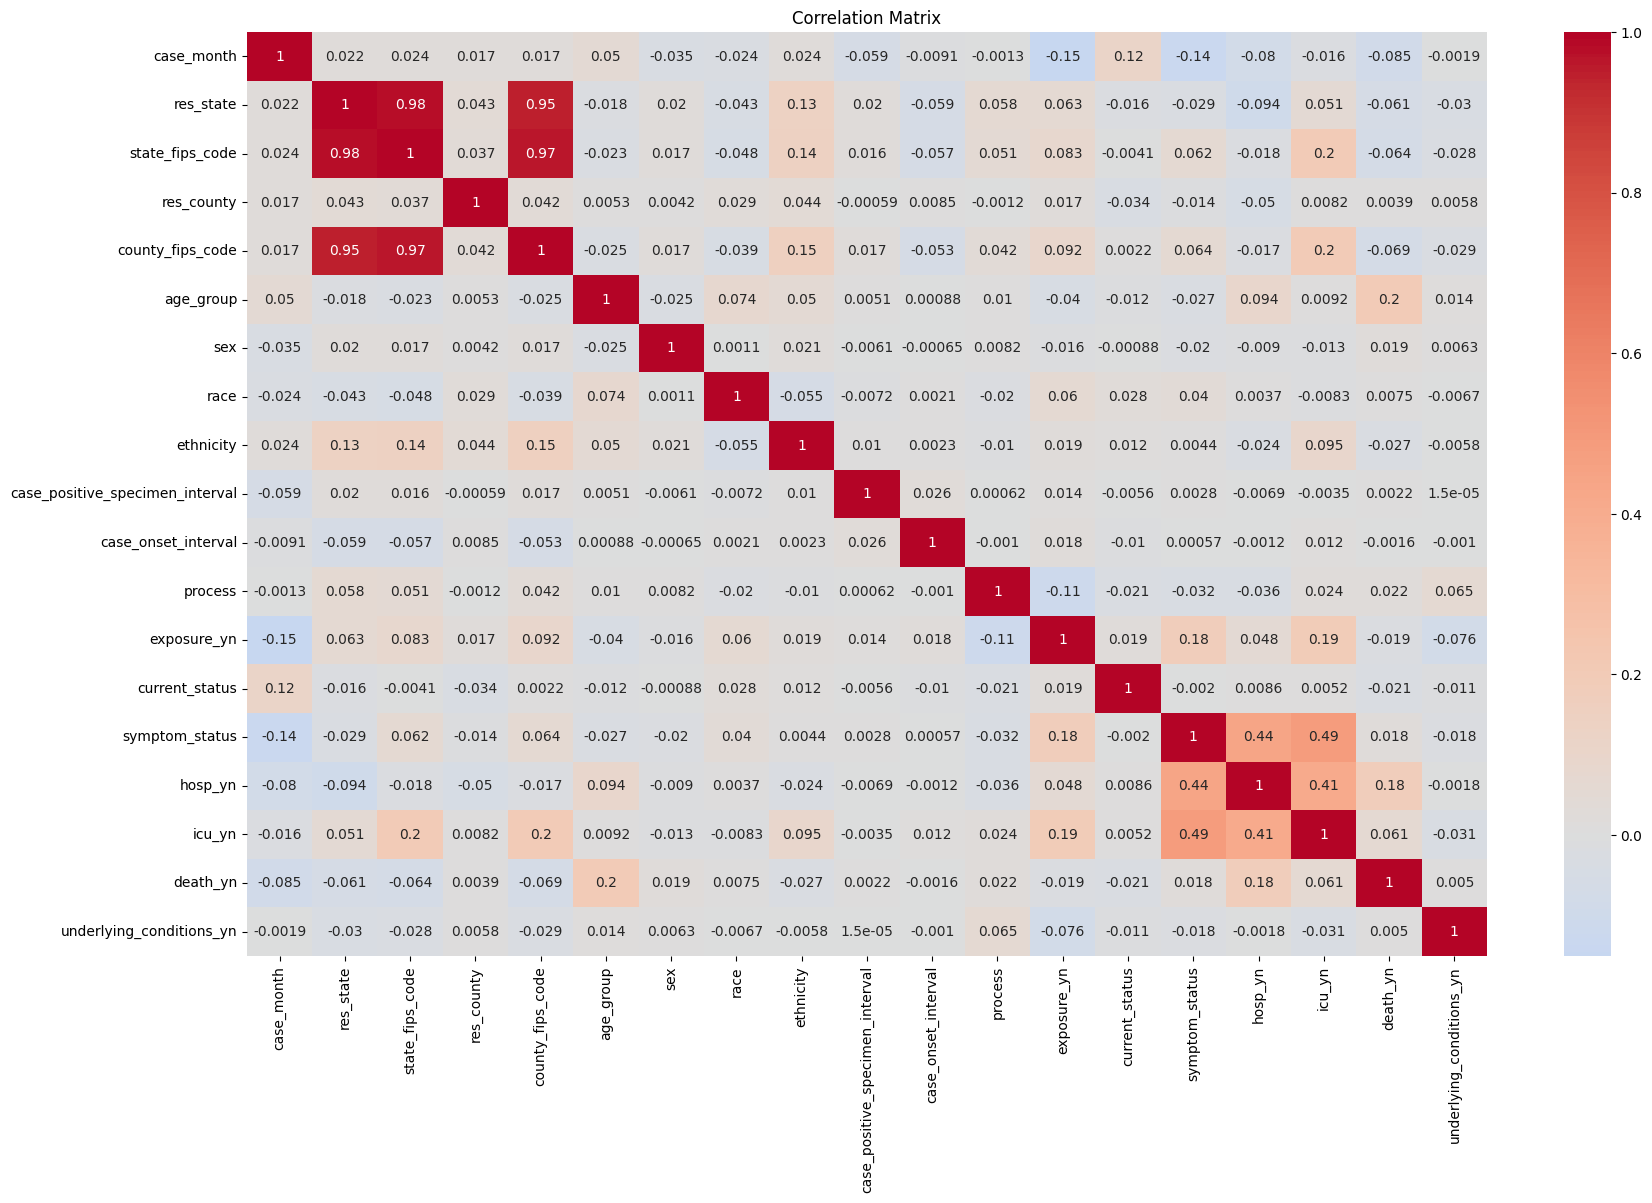

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

# Display the heatmap
plt.title('Correlation Matrix')
plt.show()


In [ ]:
threshold = 0.07

target_corr = corr['death_yn'].abs()

selected_features = target_corr[target_corr > threshold].index.tolist()

if 'death_yn' in selected_features:
    selected_features.remove('death_yn')

print("Selected features based on correlation threshold:", selected_features)


Selected features based on correlation threshold: ['case_month', 'age_group', 'hosp_yn']


In [ ]:
target = random_sample["death_yn"]
x = random_sample.drop("death_yn",axis =1)


In [ ]:
x_selected = x[selected_features]

In [ ]:
target.shape

(459887,)

# **Model Traning**

In [ ]:
log_reg = LogisticRegression(max_iter= 1000)
scores = cross_val_score(log_reg, x, target, cv=10)
print('Average Score for log reg = {}'.format(np.round(scores.mean()*100,2))) 

Average Score for log reg = 98.61


In [ ]:
naive_bayes = GaussianNB()

scores = cross_val_score(naive_bayes, x, target, cv=10)
print('Average Score for naive bayes = {}'.format(np.round(scores.mean()*100,2))) 

Average Score for naive bayes = 98.09


training over all features 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, target, test_size=0.2, random_state=42)

best_log_reg = LogisticRegression( max_iter=1000)

best_log_reg.fit(X_train, y_train)

test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9860075235382374


training over highly correlated features from the corr matrix 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_selected, target, test_size=0.2, random_state=42)

best_log_reg = LogisticRegression(class_weight = "balanced", max_iter=1000)

best_log_reg.fit(X_train, y_train)

test_accuracy = best_log_reg.score(X_test, y_test)
print("Test Accuracy: ", test_accuracy)

Test Accuracy:  0.8702733262301855


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['lbfgs',  'saga'],
    'max_iter': [2000, 3000],
    'class_weight': ['balanced'],
}

grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(x_selected, target)

print("Best Hyperparameters:", grid_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
